In [1]:
import nb_general as nb
import networkx as nx
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


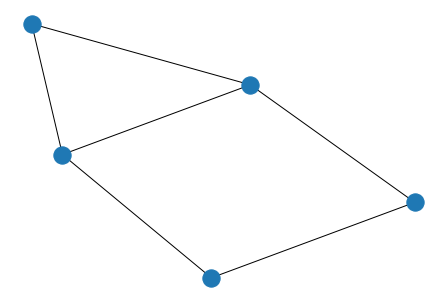

In [2]:
g = nx.Graph([[1,2],[2,3],[3,4],[4,1],[4,5],[5,1]])
nx.draw(g)

In [3]:
ex_1 = nb.NBEigVals(g)

In [4]:
np.abs(la.eigvals(la.inv(np.diag(ex_1.B.sum(axis=1)))@ex_1.B))

array([0.83815301, 0.83815301, 0.69531042, 0.76499187, 0.76499187,
       0.87601231, 0.87601231, 0.78383349, 0.78383349, 1.        ,
       0.76306581, 0.60773042])

In [5]:
matrices = []
for mu in ex_1.mu_vals:
    matrices.append(mu*ex_1.A-(ex_1.D-ex_1.I))

In [6]:
for i,m in enumerate(matrices):
    vals, vecs = la.eig(m)
    print(np.allclose(vecs@np.diag(vals)@la.inv(vecs),m))

True
True
True
True
True
True
True
True
True
True


In [7]:
ex_1.mu_vals

array([ 1.42405422+0.j        ,  1.        +0.j        ,
       -0.95668457+0.64119966j, -0.95668457-0.64119966j,
       -0.5598189 +0.99989611j, -0.5598189 -0.99989611j,
       -0.04331543+1.22718564j, -0.04331543-1.22718564j,
        0.34779179+0.97392469j,  0.34779179-0.97392469j])

In [8]:
la.eigvals(matrices[1])

array([ 1.        +0.j, -3.61803399+0.j, -2.61803399+0.j, -1.38196601+0.j,
       -0.38196601+0.j])

In [9]:
ex_1.lambda_vals

array([ 2.48119430e+00+0.j, -2.00000000e+00+0.j, -1.17008649e+00+0.j,
        1.18097701e-16+0.j,  6.88892183e-01+0.j])

In [10]:
ex_1.D

array([[3, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

In [11]:
test = (ex_1.D-ex_1.I)@ex_1.y_matrix[:,0]/np.sqrt((ex_1.D-ex_1.I)@ex_1.y_matrix[:,0]@((ex_1.D-ex_1.I)@ex_1.y_matrix[:,0]).T)

In [12]:
test

array([0.61835034+0.j, 0.27451134+0.j, 0.27451134+0.j, 0.61835034+0.j,
       0.29081395+0.j])

In [13]:
ex_1.x_matrix[:,1]/ex_1.y_matrix[:,0]

array([-1.05610409e+00+0.j,  1.18946329e+00+0.j, -1.18946329e+00+0.j,
        1.05610409e+00+0.j,  2.07825235e-16+0.j])

In [14]:
ex_1.check_all_vals(1e-8)


		--------------------1---------------------

mu: (1.424054220740945+0j)
	0 - Positive: False	Negative: True	x^Ty=(-0.9927271732131165+0j)
	1 - Positive: False	Negative: False	x^Ty=(8.183702435125697e-16+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.0872377883263342+0j)
	3 - Positive: False	Negative: False	x^Ty=(-4.119493599215496e-16+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.08295979660187308+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: True	x^Ty=(0.984957964994089+0j)
	1 - Positive: False	Negative: False	x^Ty=(-5.965007270682884e-16+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.12202436843145514+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.5665540915077003e-16+0j)
	4 - Positive: True	Negative: False	x^Ty=(0.12234320865339006+0j)

		--------------------3---------------------

mu: (-0.9566845695646844+0.6411996580570046j)
	0 - Positive: False	Negative: False	x^Ty=(3.2814112190825255e-16-3.1433841465458314

In [15]:
ex_1.y_matrix[:,0]@ex_1.x_matrix[:,4]

(-0.08295979660187308+0j)

In [16]:
ex_1.x_matrix[:,1]

array([-5.00000000e-01,  5.00000000e-01, -5.00000000e-01,  5.00000000e-01,
        9.25490977e-17])

In [17]:
la.solve(ex_1.A@ex_1.x_matrix,ex_1.y_matrix[:,0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=1.88037e-32): result may not be accurate.
  """Entry point for launching an IPython kernel.


array([ 6.38992623e-01+0.j, -6.85890966e-01+0.j, -1.00897017e+00-0.j,
       -6.17795660e+15-0.j,  6.96428571e-01+0.j])

In [18]:
ex_1.A@ex_1.x_matrix

matrix([[-1.31478263e+00,  1.00000000e+00,  5.06046761e-01,
         -3.92364603e-16,  1.23544819e-01],
        [-8.87650339e-01, -1.00000000e+00, -2.33191978e-01,
         -5.55111512e-17, -3.97112550e-01],
        [-8.87650339e-01,  1.00000000e+00, -2.33191978e-01,
         -2.77555756e-16, -3.97112550e-01],
        [-1.31478263e+00, -1.00000000e+00,  5.06046761e-01,
         -1.70319998e-16,  1.23544819e-01],
        [-1.05979820e+00,  5.55111512e-17, -8.64973260e-01,
          0.00000000e+00,  3.58676791e-01]])

In [19]:
r = 1/ex_1.mu_vals[0]*(ex_1.mu_vals[0]*np.eye(5)+ex_1.D-ex_1.I)@ex_1.y_matrix[:,0]
print(ex_1.A@ex_1.y_matrix[:,0]/np.sqrt(ex_1.A@ex_1.y_matrix[:,0]@(ex_1.A@ex_1.y_matrix[:,0]).T))
print(r/np.sqrt(r@r))

[[0.54304868+0.j 0.36245857+0.j 0.36245857+0.j 0.54304868+0.j
  0.38398417+0.j]]
[0.55610131+0.j 0.3495516 +0.j 0.3495516 +0.j 0.55610131+0.j
 0.37031069+0.j]


In [20]:
ex_1.y_matrix[:,0]

array([0.47343818+0.j, 0.42035765+0.j, 0.42035765+0.j, 0.47343818+0.j,
       0.44532175+0.j])

In [21]:
ex_1.x_matrix[:,0]/ex_1.y_matrix[:,0]

array([-1.11925721+0.j, -0.85106394+0.j, -0.85106394+0.j, -1.11925721+0.j,
       -0.95915433+0.j])

In [22]:
ex_1.lambda_vals[0]

(2.4811943040920172+0j)

In [23]:
ex_1.mu_vals[0]

(1.424054220740945+0j)

In [24]:
test_vals, test_vecs = la.eig(la.inv((ex_1.mu_vals[0]**2-1)*ex_1.I+ex_1.D)@ex_1.A)

In [25]:
test_vecs

array([[ 4.73438181e-01-0.j, -4.24890897e-01-0.j, -4.04450699e-01+0.j,
        -5.00000000e-01-0.j, -1.83668699e-01-0.j],
       [ 4.20357655e-01-0.j,  5.65214761e-01+0.j,  1.97412658e-01+0.j,
        -5.00000000e-01-0.j,  5.63775412e-01+0.j],
       [ 4.20357655e-01-0.j, -5.65214761e-01-0.j,  1.97412658e-01+0.j,
         5.00000000e-01-0.j,  5.63775412e-01-0.j],
       [ 4.73438181e-01+0.j,  4.24890897e-01-0.j, -4.04450699e-01+0.j,
         5.00000000e-01+0.j, -1.83668699e-01-0.j],
       [ 4.45321751e-01-0.j,  3.00572923e-17-0.j,  7.71294853e-01+0.j,
         1.48663364e-16-0.j, -5.44835927e-01-0.j]])

In [26]:
Q = la.inv((ex_1.mu_vals[0]**2-1)*ex_1.I+ex_1.D)@ex_1.A

In [27]:
Q@ex_1.x_matrix[:,0]

matrix([[-0.32641642+0.j, -0.29315414+0.j, -0.29315414+0.j,
         -0.32641642+0.j, -0.35000745+0.j]])

In [28]:
ex_1.lambda_vals[0]*la.inv((ex_1.mu_vals[0]**2-1)*ex_1.I+ex_1.D)@ex_1.x_matrix[:,0]

array([-0.32641642+0.j, -0.29315414+0.j, -0.29315414+0.j, -0.32641642+0.j,
       -0.35000745+0.j])

In [29]:
np.ones(ex_1.n).T@ex_1.y_matrix[:,0]*(ex_1.mu_vals[0]**2-1)

(2.295279640126546+0j)

In [30]:
(ex_1.mu_vals[0]-1)*np.ones(ex_1.n).T@(ex_1.D)@ex_1.y_matrix[:,0]

(2.2952796401265423+0j)

In [31]:
for i in range(ex_1.n*2):
    print(np.allclose(ex_1.y_matrix[:,i].T@np.ones(ex_1.n)/(ex_1.y_matrix[:,i].T@ex_1.D@np.ones(ex_1.n)),(ex_1.mu_vals[i]-1)/(ex_1.mu_vals[i]**2-1)))
    print(ex_1.y_matrix[:,i].sum())

True
(2.2329134223554785+0j)
False
(-2.2360679774997894+0j)
False
(3.067188709787467e-16+7.116359328004969e-16j)
False
(3.067188709787467e-16-7.116359328004969e-16j)
True
(-0.39541267466930374-0.1745780913657876j)
True
(-0.39541267466930374+0.1745780913657876j)
False
(7.453189599092156e-16+2.3603137043580873e-16j)
False
(7.453189599092156e-16-2.3603137043580873e-16j)
True
(-0.2040519359788805-0.2511950608277739j)
True
(-0.2040519359788805+0.2511950608277739j)


In [32]:
for i in range(ex_1.n):
    print(np.allclose(ex_1.lambda_vals[i]*ex_1.x_matrix[:,i].sum(),(ex_1.D.sum(axis=1).T@ex_1.x_matrix[:,i])))

True
True
True
True
True


In [33]:
ex_1.lambda_vals[1]*ex_1.x_matrix[:,1].sum()

(-2.961204979207259e-16+0j)

In [34]:
ex_1.D.sum(axis=1)@ex_1.x_matrix[:,1]

4.440892098500626e-16

In [35]:
ex_1.lambda_vals[1]

(-2.0000000000000004+0j)

In [36]:
ex_1.x_matrix[:,1]

array([-5.00000000e-01,  5.00000000e-01, -5.00000000e-01,  5.00000000e-01,
        9.25490977e-17])

In [37]:
L = ex_1.A-ex_1.D

In [38]:
la.eig(L)

(array([ 1.77635684e-15+0.j, -4.61803399e+00+0.j, -3.61803399e+00+0.j,
        -2.38196601e+00+0.j, -1.38196601e+00+0.j]),
 array([[-4.47213595e-01, -6.01500955e-01, -5.11667274e-01,
         -3.71748034e-01,  1.95439508e-01],
        [-4.47213595e-01,  3.71748034e-01,  1.95439508e-01,
         -6.01500955e-01, -5.11667274e-01],
        [-4.47213595e-01, -3.71748034e-01,  1.95439508e-01,
          6.01500955e-01, -5.11667274e-01],
        [-4.47213595e-01,  6.01500955e-01, -5.11667274e-01,
          3.71748034e-01,  1.95439508e-01],
        [-4.47213595e-01, -3.60822483e-16,  6.32455532e-01,
         -7.29121044e-17,  6.32455532e-01]]))

In [39]:
ex_1.y_matrix[1,0]/ex_1.y_matrix[0,0]

(0.8878828791109162+0j)

In [40]:
ex_1.x_matrix

array([[-5.29899099e-01, -5.00000000e-01, -4.32486630e-01,
        -5.00000000e-01,  1.79338395e-01],
       [-3.57751240e-01,  5.00000000e-01,  1.99294651e-01,
        -5.00000000e-01, -5.76450945e-01],
       [-3.57751240e-01, -5.00000000e-01,  1.99294651e-01,
         5.00000000e-01, -5.76450945e-01],
       [-5.29899099e-01,  5.00000000e-01, -4.32486630e-01,
         5.00000000e-01,  1.79338395e-01],
       [-4.27132287e-01,  9.25490977e-17,  7.39238740e-01,
        -1.14808847e-16,  5.20657368e-01]])

In [41]:
(ex_1.S@ex_1.y_matrix[:,0])/np.sqrt((ex_1.S@ex_1.y_matrix[:,0]).T@ex_1.S@ex_1.y_matrix[:,0])

array([0.26865057+0.j, 0.30257433+0.j, 0.28460512+0.j, 0.30257433+0.j,
       0.26865057+0.j, 0.26865057+0.j, 0.30257433+0.j, 0.26865057+0.j,
       0.30257433+0.j, 0.28460512+0.j, 0.30257433+0.j, 0.30257433+0.j])

In [42]:
ex_1.T@ex_1.T.T

array([[3., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 2.]])

In [43]:
ex_1.tau@ex_1.T.T

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [44]:
ex_1.S.T@ex_1.S

array([[3., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 2.]])

In [45]:
la.eig(la.inv(ex_1.D-ex_1.I)@(ex_1.A-ex_1.I))

(array([ 1.        +0.j, -2.3660254 +0.j, -1.70710678+0.j, -0.6339746 +0.j,
        -0.29289322+0.j]),
 array([[-4.47213595e-01, -2.43049408e-01, -3.05904941e-01,
         -5.70563204e-01,  1.73256090e-01],
        [-4.47213595e-01,  6.64023332e-01,  1.79194966e-01,
         -4.17681254e-01, -5.91533293e-01],
        [-4.47213595e-01, -6.64023332e-01,  1.79194966e-01,
          4.17681254e-01, -5.91533293e-01],
        [-4.47213595e-01,  2.43049408e-01, -3.05904941e-01,
          5.70563204e-01,  1.73256090e-01],
        [-4.47213595e-01,  3.34812406e-16,  8.65229832e-01,
          4.67353059e-16,  4.90042225e-01]]))

In [46]:
ex_1.D

array([[3, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 2]], dtype=int64)

In [47]:
ex_1.A@ex_1.y_matrix[:,0]/np.sqrt((ex_1.A@ex_1.y_matrix[:,0]).T@ex_1.A@ex_1.y_matrix[:,0])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

In [48]:
ex_1.y_matrix[:,0]

array([0.47343818+0.j, 0.42035765+0.j, 0.42035765+0.j, 0.47343818+0.j,
       0.44532175+0.j])

In [49]:
ex_1.mu_vals[0]-ex_1.lambda_vals[0]

(-1.0571400833510722+0j)

In [50]:
g2 = nx.cycle_graph(5)
ex_2 = nb.NBEigVals(g2)

In [51]:
matrices_2 = []
for mu in ex_2.mu_vals:
    matrices_2.append(mu*ex_2.A-(ex_2.D-ex_2.I))

In [52]:
for i,m in enumerate(matrices_2):
    vals, vecs = la.eig(m)
    print(np.allclose(vecs@np.diag(vals)@la.inv(vecs),m))

True
True
True
True
True
True
True
True
True
True


In [53]:
kvals, kvecs = la.eig(ex_2.K)
np.allclose(ex_2.K,kvecs@np.diag(kvals)@la.inv(kvecs))

False

In [54]:
ex_1.tau@ex_1.T.T

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [55]:
ex_1.S.T@ex_1.S

array([[3., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 2.]])

In [56]:
la.eig(matrices[0])

(array([ 2.02793042+0.j, -4.43333565+0.j, -3.09174027+0.j, -1.41477279+0.j,
        -0.08808172+0.j]),
 array([[ 4.73438181e-01+0.j,  5.76906292e-01+0.j, -4.88994897e-01+0.j,
         -4.08875446e-01-0.j,  1.91677542e-01+0.j],
        [ 4.20357655e-01+0.j, -4.08875446e-01-0.j,  1.98064833e-01+0.j,
         -5.76906292e-01-0.j, -5.32981955e-01+0.j],
        [ 4.20357655e-01+0.j,  4.08875446e-01-0.j,  1.98064833e-01+0.j,
          5.76906292e-01+0.j, -5.32981955e-01+0.j],
        [ 4.73438181e-01+0.j, -5.76906292e-01-0.j, -4.88994897e-01+0.j,
          4.08875446e-01-0.j,  1.91677542e-01+0.j],
        [ 4.45321751e-01+0.j,  3.13033644e-16-0.j,  6.65814258e-01+0.j,
          1.55878748e-16-0.j,  5.98648404e-01+0.j]]))

In [57]:
ex_1.D@ex_1.y_matrix[:,0]

array([1.42031454+0.j, 0.84071531+0.j, 0.84071531+0.j, 1.42031454+0.j,
       0.8906435 +0.j])

In [58]:
ex_1.mu_vals[0]**2

(2.0279304236101003+0j)

In [59]:
ex_1.A@y

NameError: name 'y' is not defined

In [60]:
ex_1.check_all_vals(1e-8)


		--------------------1---------------------

mu: (1.424054220740945+0j)
	0 - Positive: False	Negative: True	x^Ty=(-0.9927271732131165+0j)
	1 - Positive: False	Negative: False	x^Ty=(8.183702435125697e-16+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.0872377883263342+0j)
	3 - Positive: False	Negative: False	x^Ty=(-4.119493599215496e-16+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.08295979660187308+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: True	x^Ty=(0.984957964994089+0j)
	1 - Positive: False	Negative: False	x^Ty=(-5.965007270682884e-16+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.12202436843145514+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.5665540915077003e-16+0j)
	4 - Positive: True	Negative: False	x^Ty=(0.12234320865339006+0j)

		--------------------3---------------------

mu: (-0.9566845695646844+0.6411996580570046j)
	0 - Positive: False	Negative: False	x^Ty=(3.2814112190825255e-16-3.1433841465458314

In [61]:
y = ex_1.y_matrix[:,0]

In [62]:
x0 = ex_1.x_matrix[:,0]
x1 = ex_1.x_matrix[:,1]
x2 = ex_1.x_matrix[:,2]
x3 = ex_1.x_matrix[:,3]
x4 = ex_1.x_matrix[:,4]

In [63]:
ex_1.A@x0

matrix([[-1.31478263, -0.88765034, -0.88765034, -1.31478263, -1.0597982 ]])

In [64]:
y/(ex_1.A@y)

matrix([[0.35354489+0.j, 0.47030612+0.j, 0.47030612+0.j, 0.35354489+0.j,
         0.47030612+0.j]])

In [65]:
np.round(ex_1.x_matrix.T@ex_1.y_matrix,5)

array([[-0.99273+0.j     ,  0.98496+0.j     ,  0.     -0.j     ,
         0.     +0.j     ,  0.05981+0.08818j,  0.05981-0.08818j,
        -0.     -0.j     , -0.     +0.j     , -0.03029+0.10307j,
        -0.03029-0.10307j],
       [ 0.     +0.j     , -0.     +0.j     ,  0.98928-0.01954j,
         0.98928+0.01954j, -0.     -0.j     , -0.     +0.j     ,
         0.00881+0.21758j,  0.00881-0.21758j,  0.     +0.j     ,
         0.     -0.j     ],
       [ 0.08724+0.j     , -0.12202+0.j     ,  0.     +0.j     ,
         0.     -0.j     , -1.0035 +0.00762j, -1.0035 -0.00762j,
         0.     -0.j     ,  0.     +0.j     ,  0.01848-0.08401j,
         0.01848+0.08401j],
       [-0.     +0.j     ,  0.     +0.j     , -0.1817 -0.10636j,
        -0.1817 +0.10636j, -0.     +0.j     , -0.     -0.j     ,
         1.02336-0.00187j,  1.02336+0.00187j, -0.     +0.j     ,
        -0.     -0.j     ],
       [-0.08296+0.j     ,  0.12234+0.j     , -0.     -0.j     ,
        -0.     +0.j     , -0.03702-0.06417

In [66]:
cvals, cvecs = la.eig(ex_1.C)

In [67]:
cvals

array([ 2.48119430e+00+0.00000000e+00j, -2.00000000e+00+0.00000000e+00j,
       -1.17008649e+00+0.00000000e+00j,  6.88892183e-01+0.00000000e+00j,
        1.80283382e-16+1.00310787e-08j,  1.80283382e-16-1.00310787e-08j,
        2.65777312e-16+0.00000000e+00j, -1.08863688e-15+0.00000000e+00j,
       -2.65864792e-16+0.00000000e+00j, -5.67355781e-17+0.00000000e+00j,
       -2.21060463e-32+0.00000000e+00j,  6.50286732e-33+0.00000000e+00j])

In [68]:
cvecs[:,0]

array([0.22352529+0.j, 0.33108439+0.j, 0.26687502+0.j, 0.33108439+0.j,
       0.22352529+0.j, 0.22352529+0.j, 0.33108439+0.j, 0.22352529+0.j,
       0.33108439+0.j, 0.26687502+0.j, 0.33108439+0.j, 0.33108439+0.j])

In [69]:
x0

array([-0.5298991 , -0.35775124, -0.35775124, -0.5298991 , -0.42713229])

In [70]:
c0 = ex_1.S@x0/np.sqrt((ex_1.S@x0).T@ex_1.S@x0)

In [71]:
b0 = np.block([ex_1.S,ex_1.T.T])@ex_1.kvecs[:,0]/np.sqrt((np.block([ex_1.S,ex_1.T.T])@ex_1.kvecs[:,0]).T@(np.block([ex_1.S,ex_1.T.T])@ex_1.kvecs[:,0]))

In [72]:
np.block([ex_1.S,ex_1.T.T])@ex_1.kvecs[:,0]

array([0.12942701+0.j, 0.08598712+0.j, 0.10899696+0.j, 0.03290659+0.j,
       0.07634649+0.j, 0.07634649+0.j, 0.03290659+0.j, 0.12942701+0.j,
       0.08598712+0.j, 0.10899696+0.j, 0.05787069+0.j, 0.05787069+0.j])

In [73]:
la.eig(ex_1.B)[1][:,-3]

array([-0.18439693+0.j, -0.29574985+0.j, -0.23676689+0.j, -0.37394415+0.j,
       -0.26259123+0.j, -0.26259123+0.j, -0.37394415+0.j, -0.18439693+0.j,
       -0.29574985+0.j, -0.23676689+0.j, -0.33716889+0.j, -0.33716889+0.j])

In [74]:
ex_1.tau@ex_1.S

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [75]:
ex_1.B@la.eig(ex_1.B)[1][:,-3]/la.eig(ex_1.B)[1][:,-3]

array([1.42405422-0.j, 1.42405422-0.j, 1.42405422-0.j, 1.42405422-0.j,
       1.42405422-0.j, 1.42405422-0.j, 1.42405422-0.j, 1.42405422-0.j,
       1.42405422-0.j, 1.42405422-0.j, 1.42405422-0.j, 1.42405422-0.j])

In [76]:
ex_1.kvecs[:,0]

array([-0.38745106+0.j, -0.34401117+0.j, -0.34401117+0.j, -0.38745106+0.j,
       -0.36444122+0.j,  0.47343818+0.j,  0.42035765+0.j,  0.42035765+0.j,
        0.47343818+0.j,  0.44532175+0.j])

In [77]:
ex_1.tau@ex_1.S

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


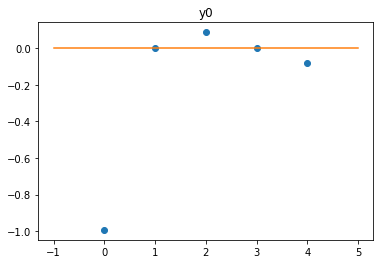

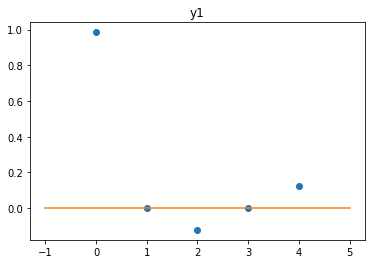

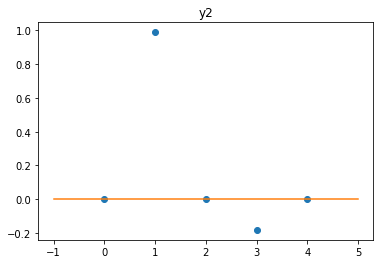

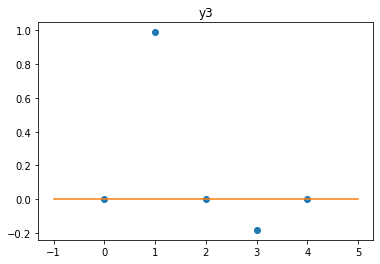

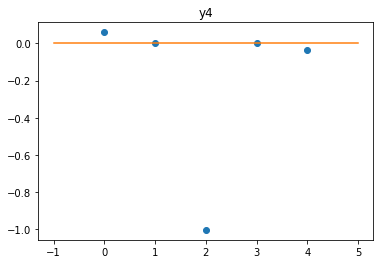

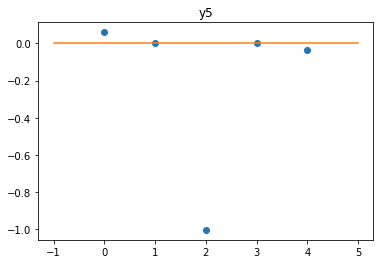

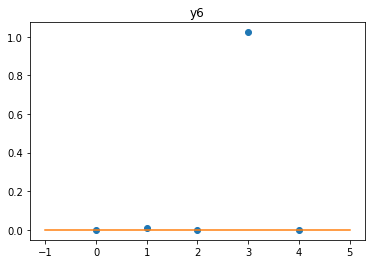

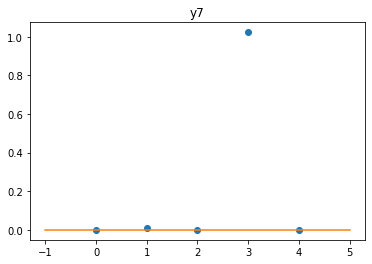

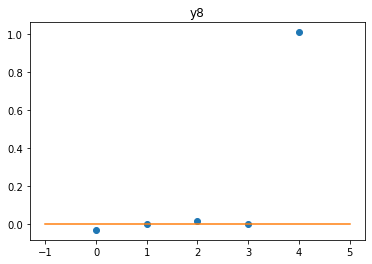

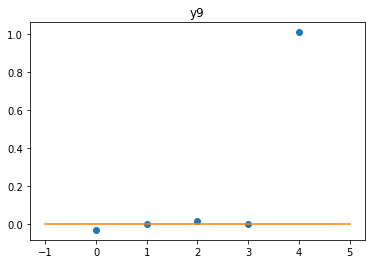

In [78]:
for j in range(10):
    plt.plot([i for i in range(5)],ex_1.x_matrix.T@ex_1.y_matrix[:,j],'o')
    plt.plot([i for i in range(-1,6)],[0 for i in range(7)])
    plt.title(f"y{j}")
    plt.show()

In [79]:
ex_1.mu_vals[0]*ex_1.A-ex_1.D

matrix([[-3.        +0.j,  1.42405422+0.j,  0.        +0.j,
          1.42405422+0.j,  1.42405422+0.j],
        [ 1.42405422+0.j, -2.        +0.j,  1.42405422+0.j,
          0.        +0.j,  0.        +0.j],
        [ 0.        +0.j,  1.42405422+0.j, -2.        +0.j,
          1.42405422+0.j,  0.        +0.j],
        [ 1.42405422+0.j,  0.        +0.j,  1.42405422+0.j,
         -3.        +0.j,  1.42405422+0.j],
        [ 1.42405422+0.j,  0.        +0.j,  0.        +0.j,
          1.42405422+0.j, -2.        +0.j]])

In [80]:
ex_1.check_all_vals(1e-8)


		--------------------1---------------------

mu: (1.424054220740945+0j)
	0 - Positive: False	Negative: True	x^Ty=(-0.9927271732131165+0j)
	1 - Positive: False	Negative: False	x^Ty=(8.183702435125697e-16+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.0872377883263342+0j)
	3 - Positive: False	Negative: False	x^Ty=(-4.119493599215496e-16+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.08295979660187308+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: True	x^Ty=(0.984957964994089+0j)
	1 - Positive: False	Negative: False	x^Ty=(-5.965007270682884e-16+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.12202436843145514+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.5665540915077003e-16+0j)
	4 - Positive: True	Negative: False	x^Ty=(0.12234320865339006+0j)

		--------------------3---------------------

mu: (-0.9566845695646844+0.6411996580570046j)
	0 - Positive: False	Negative: False	x^Ty=(3.2814112190825255e-16-3.1433841465458314

In [81]:
ex_1.x_matrix[:,0]/ex_1.y_matrix[:,0]

array([-1.11925721+0.j, -0.85106394+0.j, -0.85106394+0.j, -1.11925721+0.j,
       -0.95915433+0.j])

In [82]:
ex_1.y_matrix[:,2]

array([-4.03788949e-01+6.29473024e-02j,  5.85492488e-01+4.34120431e-02j,
       -5.85492488e-01-4.34120431e-02j,  4.03788949e-01-6.29473024e-02j,
       -2.48392641e-16+4.55021180e-17j])

In [84]:
for i in range(ex_1.n):
    print(ex_1.x_matrix[:,i].T@(ex_1.D-ex_1.I)@ex_1.y_matrix[:,0])

(-1.4944761038168275+0j)
(1.1514371509001167e-15+0j)
(-0.3222735779737702+0j)
(-1.621491793808894e-16+0j)
(0.08685149072148443+0j)


In [85]:
for i in range(ex_1.n):
    print(ex_1.x_matrix[:,i].T@ex_1.y_matrix[:,0])

(-0.9927271732131165+0j)
(8.183702435125697e-16+0j)
(0.0872377883263342+0j)
(-4.119493599215496e-16+0j)
(-0.08295979660187308+0j)


In [86]:
g = nx.karate_club_graph()
karate = nb.NBEigVals(g)

In [87]:
karate.check_all_vals(1e-8)


		--------------------1---------------------

mu: 0j
	0 - Positive: False	Negative: True	x^Ty=(0.05285569749352145+0j)
	1 - Positive: False	Negative: True	x^Ty=(0.07772861224875752+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.07068279835693356+0j)
	3 - Positive: False	Negative: True	x^Ty=(-0.08042541410990725+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.17831554001041572+0j)
	5 - Positive: True	Negative: False	x^Ty=(-0.06784060486233051+0j)
	6 - Positive: True	Negative: False	x^Ty=(0.07031663160119114+0j)
	7 - Positive: False	Negative: True	x^Ty=(0.0061617793463962355+0j)
	8 - Positive: True	Negative: False	x^Ty=(0.0008968692344632907+0j)
	9 - Positive: False	Negative: True	x^Ty=(-0.03976312179430628+0j)
	10 - Positive: True	Negative: False	x^Ty=(0.041087702881431494+0j)
	11 - Positive: True	Negative: False	x^Ty=(0.03187097875743563+0j)
	12 - Positive: False	Negative: True	x^Ty=(-0.14530998210815121+0j)
	13 - Positive: True	Negative: False	x^Ty=(0.07991194162584206+0j)
	14 - P

	8 - Positive: True	Negative: False	x^Ty=(0.0004616202673598355-0.00238933697362335j)
	9 - Positive: True	Negative: False	x^Ty=(0.0731544831514868+0.0045801618020082195j)
	10 - Positive: False	Negative: True	x^Ty=(-0.11094355714511282+0.02503884548019371j)
	11 - Positive: False	Negative: True	x^Ty=(-0.8323515725045314+0.025745783850619253j)
	12 - Positive: False	Negative: True	x^Ty=(-0.5528384341028917+0.007124340916130919j)
	13 - Positive: False	Negative: True	x^Ty=(0.07155281814541561+0.00216019315639741j)
	14 - Positive: True	Negative: False	x^Ty=(-0.06388917365745594+0.00778676686628425j)
	15 - Positive: False	Negative: True	x^Ty=(0.0596270066337357+0.034983022822313664j)
	16 - Positive: False	Negative: True	x^Ty=(0.03678635846104975+0.035519442969067894j)
	17 - Positive: False	Negative: True	x^Ty=(0.031584723294958796+0.04061444898264021j)
	18 - Positive: False	Negative: True	x^Ty=(0.0871408684770602+0.08948090692656754j)
	19 - Positive: False	Negative: True	x^Ty=(0.13265655950216

	5 - Positive: False	Negative: False	x^Ty=(-2.2638141361497333e-16+1.1449174941446927e-16j)
	6 - Positive: False	Negative: False	x^Ty=(-4.5102810375396984e-17+3.0878077872387166e-16j)
	7 - Positive: False	Negative: False	x^Ty=(-4.163336342344337e-17-1.3877787807814457e-16j)
	8 - Positive: False	Negative: False	x^Ty=(-1.457167719820518e-16+1.6653345369377348e-16j)
	9 - Positive: False	Negative: False	x^Ty=(2.2551405187698492e-17-6.331740687315346e-17j)
	10 - Positive: False	Negative: False	x^Ty=(-2.914335439641036e-16-3.122502256758253e-16j)
	11 - Positive: False	Negative: False	x^Ty=(4.544975507059235e-16+1.1102230246251565e-16j)
	12 - Positive: False	Negative: False	x^Ty=(-6.245004513516506e-17+2.2898349882893854e-16j)
	13 - Positive: False	Negative: False	x^Ty=(-5.689893001203927e-16+1.8041124150158794e-16j)
	14 - Positive: False	Negative: False	x^Ty=(4.668574554722582e-16-2.47198095326695e-16j)
	15 - Positive: False	Negative: False	x^Ty=(-4.0332320816460765e-16+8.066464163292153e-16

In [88]:
import urllib.request as urllib
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)

football = nb.NBEigVals(G)

In [89]:
football.check_all_vals(1e-8)


		--------------------1---------------------

mu: (9.770108194532375+0j)
	0 - Positive: True	Negative: False	x^Ty=(0.9998646953951635+0j)
	1 - Positive: False	Negative: True	x^Ty=(-0.011772408296128632+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.00217846051800182+0j)
	3 - Positive: False	Negative: True	x^Ty=(-0.0013517563199945196+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.00330433957444975+0j)
	5 - Positive: False	Negative: True	x^Ty=(-0.0068958762190260755+0j)
	6 - Positive: False	Negative: True	x^Ty=(-0.0005741744350971583+0j)
	7 - Positive: False	Negative: True	x^Ty=(-0.0014993442348191644+0j)
	8 - Positive: False	Negative: True	x^Ty=(-0.0021587555444915214+0j)
	9 - Positive: False	Negative: True	x^Ty=(-0.0019940807537825976+0j)
	10 - Positive: False	Negative: True	x^Ty=(-0.0034892729630281293+0j)
	11 - Positive: True	Negative: False	x^Ty=(0.003217394514733468+0j)
	12 - Positive: False	Negative: True	x^Ty=(-4.458421463854294e-05+0j)
	13 - Positive: True	Negative: False	x

	15 - Positive: True	Negative: False	x^Ty=(3.096343456114607e-05+0j)
	16 - Positive: False	Negative: True	x^Ty=(-0.0001312910857458694+0j)
	17 - Positive: True	Negative: False	x^Ty=(0.00015394999257992107+0j)
	18 - Positive: True	Negative: False	x^Ty=(0.00032770207975136396+0j)
	19 - Positive: True	Negative: False	x^Ty=(0.0003360782731878979+0j)
	20 - Positive: True	Negative: False	x^Ty=(0.0008910204764451762+0j)
	21 - Positive: True	Negative: False	x^Ty=(0.0007238967331242288+0j)
	22 - Positive: True	Negative: False	x^Ty=(0.0006144172346054651+0j)
	23 - Positive: True	Negative: False	x^Ty=(0.0006245562141270171+0j)
	24 - Positive: False	Negative: True	x^Ty=(-0.00010744496544074556+0j)
	25 - Positive: True	Negative: False	x^Ty=(0.0010571440825258712+0j)
	26 - Positive: False	Negative: True	x^Ty=(-0.0005613342411987101+0j)
	27 - Positive: False	Negative: True	x^Ty=(-0.0022181607622395343+0j)
	28 - Positive: True	Negative: False	x^Ty=(0.0009546584354891009+0j)
	29 - Positive: False	Negat

	41 - Positive: True	Negative: False	x^Ty=(0.0013488442590880302+0j)
	42 - Positive: True	Negative: False	x^Ty=(0.0006624448336756607+0j)
	43 - Positive: True	Negative: False	x^Ty=(0.0007325780511429658+0j)
	44 - Positive: False	Negative: True	x^Ty=(-0.004126105045206279+0j)
	45 - Positive: False	Negative: True	x^Ty=(-0.001147613546627656+0j)
	46 - Positive: True	Negative: False	x^Ty=(0.002523243961583489+0j)
	47 - Positive: True	Negative: False	x^Ty=(0.0013092044393386785+0j)
	48 - Positive: True	Negative: False	x^Ty=(0.0011603247814421086+0j)
	49 - Positive: True	Negative: False	x^Ty=(0.0004734346964947501+0j)
	50 - Positive: True	Negative: False	x^Ty=(0.0005657825879476015+0j)
	51 - Positive: True	Negative: False	x^Ty=(0.0003573869839048654+0j)
	52 - Positive: False	Negative: True	x^Ty=(-0.0006260611406296004+0j)
	53 - Positive: False	Negative: True	x^Ty=(-2.736453022602975e-06+0j)
	54 - Positive: True	Negative: False	x^Ty=(0.0014928755842851143+0j)
	55 - Positive: False	Negative: T

	79 - Positive: True	Negative: False	x^Ty=(0.0035013293999870145+0j)
	80 - Positive: False	Negative: True	x^Ty=(-0.0034229390868575197+0j)
	81 - Positive: False	Negative: True	x^Ty=(-0.0034800896165944647+0j)
	82 - Positive: True	Negative: False	x^Ty=(0.004203722659475891+0j)
	83 - Positive: True	Negative: False	x^Ty=(0.002396594254763011+0j)
	84 - Positive: True	Negative: False	x^Ty=(0.003751197605132403+0j)
	85 - Positive: True	Negative: False	x^Ty=(0.0031596484168106443+0j)
	86 - Positive: False	Negative: True	x^Ty=(-0.005286400190312237+0j)
	87 - Positive: True	Negative: False	x^Ty=(0.0018839367782949987+0j)
	88 - Positive: False	Negative: True	x^Ty=(-0.0040000872697995606+0j)
	89 - Positive: False	Negative: True	x^Ty=(-0.0047294221358062365+0j)
	90 - Positive: False	Negative: True	x^Ty=(-0.00021143988616904993+0j)
	91 - Positive: True	Negative: False	x^Ty=(0.0007798372625483764+0j)
	92 - Positive: True	Negative: False	x^Ty=(0.0006624400871637274+0j)
	93 - Positive: False	Negative:

	98 - Positive: False	Negative: True	x^Ty=(-0.0028870444992085396-0.0031014581887586316j)
	99 - Positive: False	Negative: True	x^Ty=(-0.0011684918257600565-0.0026875942502678643j)
	100 - Positive: True	Negative: False	x^Ty=(0.001447400761519659+0.0022513036407751773j)
	101 - Positive: True	Negative: False	x^Ty=(0.0011991562273705857+0.0023741317293659624j)
	102 - Positive: True	Negative: False	x^Ty=(0.003939950003248916+0.004300267664267978j)
	103 - Positive: False	Negative: True	x^Ty=(-0.002535963681436347-0.003440248392954407j)
	104 - Positive: False	Negative: True	x^Ty=(-0.00133114747084334-0.0027238308298673996j)
	105 - Positive: False	Negative: True	x^Ty=(-0.0037921320100667987-0.003546242879552606j)
	106 - Positive: True	Negative: False	x^Ty=(0.0052588438327300655+0.009672378311707787j)
	107 - Positive: True	Negative: False	x^Ty=(0.002486426832849375+0.0012563259024136989j)
	108 - Positive: True	Negative: False	x^Ty=(0.0037775060941714297+0.004333099945011352j)
	109 - Positive: T

	0 - Positive: False	Negative: True	x^Ty=(0.00038285329365194196-6.520137581519285e-05j)
	1 - Positive: False	Negative: True	x^Ty=(0.00015283975268481036-0.0007251509837596396j)
	2 - Positive: True	Negative: False	x^Ty=(-0.0008571507808722115+0.00015205488212336797j)
	3 - Positive: False	Negative: True	x^Ty=(0.0020670626801156528-0.0020862523064696056j)
	4 - Positive: False	Negative: True	x^Ty=(0.000127458701293208-0.0004269769473694747j)
	5 - Positive: False	Negative: True	x^Ty=(0.00010366137335721383-0.00043932622762428463j)
	6 - Positive: False	Negative: True	x^Ty=(0.0004073117487157597-0.0011671328015782313j)
	7 - Positive: True	Negative: False	x^Ty=(-0.001184750048199519+0.0010576753128324152j)
	8 - Positive: False	Negative: True	x^Ty=(0.0037340512992612386-0.004423272396640518j)
	9 - Positive: False	Negative: True	x^Ty=(0.000614144271576429-0.0010511693337410817j)
	10 - Positive: False	Negative: True	x^Ty=(-0.00021804671623228082-0.0005569246711132265j)
	11 - Positive: True	Negat

	21 - Positive: False	Negative: True	x^Ty=(-0.026303405277878278-0.010007664989846178j)
	22 - Positive: False	Negative: True	x^Ty=(-0.0005429188843861744-0.0011602177004674038j)
	23 - Positive: True	Negative: False	x^Ty=(-0.06403530462123418+0.026995077591321612j)
	24 - Positive: True	Negative: False	x^Ty=(-0.041266334061642394+0.02325821679034208j)
	25 - Positive: False	Negative: True	x^Ty=(0.019933336217782743-0.023563370037076335j)
	26 - Positive: False	Negative: True	x^Ty=(0.0069323868368136275+2.856135641538125e-05j)
	27 - Positive: False	Negative: True	x^Ty=(0.005888727825303124-0.005944188693009787j)
	28 - Positive: False	Negative: True	x^Ty=(0.0010213612976365056+0.00034574128251058014j)
	29 - Positive: False	Negative: True	x^Ty=(0.005183195868771071-0.0107986898793607j)
	30 - Positive: False	Negative: True	x^Ty=(-0.03890167094345444-0.01831091402016386j)
	31 - Positive: False	Negative: True	x^Ty=(0.03192099318885453+0.001010275364850819j)
	32 - Positive: False	Negative: True	x

	59 - Positive: True	Negative: False	x^Ty=(0.00970777333871006+0j)
	60 - Positive: False	Negative: True	x^Ty=(-0.0037123691616832966+0j)
	61 - Positive: True	Negative: False	x^Ty=(0.0008615245820893023+0j)
	62 - Positive: False	Negative: True	x^Ty=(-0.00020772368754444192+0j)
	63 - Positive: False	Negative: True	x^Ty=(-0.001974820744801678+0j)
	64 - Positive: True	Negative: False	x^Ty=(0.004473353279398822+0j)
	65 - Positive: True	Negative: False	x^Ty=(0.0003226042046638397+0j)
	66 - Positive: False	Negative: True	x^Ty=(-0.00432414520630178+0j)
	67 - Positive: False	Negative: True	x^Ty=(-0.0005505781463754657+0j)
	68 - Positive: False	Negative: True	x^Ty=(-0.0005007812034405816+0j)
	69 - Positive: True	Negative: False	x^Ty=(0.0013946527847389447+0j)
	70 - Positive: True	Negative: False	x^Ty=(0.00892695718037081+0j)
	71 - Positive: True	Negative: False	x^Ty=(0.0025407441359489094+0j)
	72 - Positive: True	Negative: False	x^Ty=(0.007179940285003131+0j)
	73 - Positive: False	Negative: True

	98 - Positive: False	Negative: True	x^Ty=(-0.004714379560174324+0j)
	99 - Positive: True	Negative: False	x^Ty=(0.003524759848012132+0j)
	100 - Positive: False	Negative: True	x^Ty=(-0.007529083301945376+0j)
	101 - Positive: False	Negative: True	x^Ty=(-0.0008907382650583542+0j)
	102 - Positive: True	Negative: False	x^Ty=(0.0016020735848549057+0j)
	103 - Positive: True	Negative: False	x^Ty=(0.0017819972332976375+0j)
	104 - Positive: False	Negative: True	x^Ty=(-0.004587267854705636+0j)
	105 - Positive: True	Negative: False	x^Ty=(0.009942975325298298+0j)
	106 - Positive: True	Negative: False	x^Ty=(0.009375728175165255+0j)
	107 - Positive: False	Negative: True	x^Ty=(-0.0016875751223545392+0j)
	108 - Positive: True	Negative: False	x^Ty=(0.0008245756457636364+0j)
	109 - Positive: False	Negative: True	x^Ty=(-0.008379855112451486+0j)
	110 - Positive: False	Negative: True	x^Ty=(-0.007482456081760956+0j)
	111 - Positive: False	Negative: True	x^Ty=(-0.009486912348132884+0j)
	112 - Positive: False	

	27 - Positive: False	Negative: True	x^Ty=(-0.04508202879318846+0.031189037823078018j)
	28 - Positive: True	Negative: False	x^Ty=(-0.002789129831709485-0.042463587280370065j)
	29 - Positive: True	Negative: False	x^Ty=(0.011750438016956589-0.013365311218510388j)
	30 - Positive: True	Negative: False	x^Ty=(0.003731229288993457-0.0010282962243778955j)
	31 - Positive: True	Negative: False	x^Ty=(-0.0008386401934797322-0.004516447464452279j)
	32 - Positive: False	Negative: True	x^Ty=(-0.004333586673553048+0.0007218451712420819j)
	33 - Positive: True	Negative: False	x^Ty=(0.0024176402162586538-0.006756453259841391j)
	34 - Positive: True	Negative: False	x^Ty=(4.5993332319532235e-05-0.008032303481391124j)
	35 - Positive: True	Negative: False	x^Ty=(0.053899260760855196-0.11322493213884194j)
	36 - Positive: True	Negative: False	x^Ty=(-0.0017559159663268014-0.02347630399896524j)
	37 - Positive: False	Negative: True	x^Ty=(-0.0018575643168830648+0.006183900418143892j)
	38 - Positive: False	Negative: 

	57 - Positive: False	Negative: True	x^Ty=(0.0029696910250022685+0.004457505967588166j)
	58 - Positive: True	Negative: False	x^Ty=(-0.005507913646326196+6.726994755006449e-06j)
	59 - Positive: True	Negative: False	x^Ty=(-0.0026014281919251063-0.005918768086166217j)
	60 - Positive: False	Negative: True	x^Ty=(0.011044070529249344+0.01799024072953203j)
	61 - Positive: True	Negative: False	x^Ty=(-0.005995289398743087-0.024482240235584755j)
	62 - Positive: True	Negative: False	x^Ty=(-0.003914259043453633-0.006736032194654337j)
	63 - Positive: True	Negative: False	x^Ty=(-0.004503956263025361-0.002399052350103797j)
	64 - Positive: True	Negative: False	x^Ty=(-0.010921902262106526-0.010965881061323257j)
	65 - Positive: True	Negative: False	x^Ty=(-0.003910287235688065-0.002720425976721253j)
	66 - Positive: False	Negative: True	x^Ty=(0.004661724661739433+0.00537369184706348j)
	67 - Positive: True	Negative: False	x^Ty=(-0.004145805672768032+6.505975177531165e-05j)
	68 - Positive: False	Negative: T

	78 - Positive: False	Negative: True	x^Ty=(-0.012072668584711933+0.01438539453208983j)
	79 - Positive: False	Negative: True	x^Ty=(-0.009158533815036604+0.0014249262206006722j)
	80 - Positive: False	Negative: True	x^Ty=(-0.0031630998479599943-0.00017531911013553866j)
	81 - Positive: False	Negative: True	x^Ty=(-0.0049620061244379995+0.008123564485723024j)
	82 - Positive: True	Negative: False	x^Ty=(0.0010433955202941195-0.0027166462306544513j)
	83 - Positive: True	Negative: False	x^Ty=(0.005869711497949701-0.010276456412302333j)
	84 - Positive: False	Negative: True	x^Ty=(-0.016634918905480092+0.0026294753819866143j)
	85 - Positive: False	Negative: True	x^Ty=(-0.0015463225913114602+0.021884103332339762j)
	86 - Positive: True	Negative: False	x^Ty=(0.012582464501226373-0.0034629408309541075j)
	87 - Positive: False	Negative: True	x^Ty=(-0.003618399455164558+0.0016137415864348056j)
	88 - Positive: True	Negative: False	x^Ty=(0.009668505041750826-0.005555396341906988j)
	89 - Positive: True	Negat

	1 - Positive: True	Negative: False	x^Ty=(-0.0011770841986119224+0.0020111813974368824j)
	2 - Positive: True	Negative: False	x^Ty=(-0.0011982722913097732+0.0019919481841400707j)
	3 - Positive: True	Negative: False	x^Ty=(-0.0015954007465322712+0.0009868028708962956j)
	4 - Positive: True	Negative: False	x^Ty=(-0.0013956371428922578+0.0016806534045073027j)
	5 - Positive: False	Negative: True	x^Ty=(0.001391582414549854+0.0005257445902644816j)
	6 - Positive: True	Negative: False	x^Ty=(-0.0007526268799198121+0.001559021949200851j)
	7 - Positive: False	Negative: True	x^Ty=(0.000852024983196195+0.0011150308122793026j)
	8 - Positive: True	Negative: False	x^Ty=(-0.0014917930009266432+0.0008288429451890418j)
	9 - Positive: True	Negative: False	x^Ty=(-0.0002821894074803323+0.0006837290064876436j)
	10 - Positive: True	Negative: False	x^Ty=(-0.0018169146943834843+0.0024398505063253626j)
	11 - Positive: False	Negative: True	x^Ty=(0.001915574359635859-0.007323756327902382j)
	12 - Positive: False	Negat

	39 - Positive: False	Negative: True	x^Ty=(0.05521552509045825-0.012393874804415592j)
	40 - Positive: False	Negative: True	x^Ty=(-0.10210838048730216-0.18085140152575954j)
	41 - Positive: False	Negative: True	x^Ty=(-0.002336739198261706-0.006976256243772058j)
	42 - Positive: False	Negative: True	x^Ty=(-0.0002981560237699995-0.005016608454972187j)
	43 - Positive: True	Negative: False	x^Ty=(-9.778398508072585e-05+0.008324067503983507j)
	44 - Positive: True	Negative: False	x^Ty=(-0.017364902731803238+0.002210838785849794j)
	45 - Positive: True	Negative: False	x^Ty=(-0.0004042152520276639+0.015989675864484576j)
	46 - Positive: False	Negative: True	x^Ty=(-0.06674026791725965-0.14363311257921083j)
	47 - Positive: True	Negative: False	x^Ty=(0.013725672064132038+0.09332522801777318j)
	48 - Positive: False	Negative: True	x^Ty=(0.00029881899125615134-0.026012413941854984j)
	49 - Positive: True	Negative: False	x^Ty=(0.0004652874632770276+0.016974065957212178j)
	50 - Positive: True	Negative: False

	79 - Positive: True	Negative: False	x^Ty=(-0.005373093815016001+0.006708569700480749j)
	80 - Positive: False	Negative: True	x^Ty=(0.014348811872839278-0.014330183501486767j)
	81 - Positive: True	Negative: False	x^Ty=(-0.0064152230950292755+0.01894861153546219j)
	82 - Positive: True	Negative: False	x^Ty=(-0.01132067955207935+0.00943044340733159j)
	83 - Positive: False	Negative: True	x^Ty=(0.005758359052566056-0.0035052263765259803j)
	84 - Positive: True	Negative: False	x^Ty=(-0.0034538533560053352+0.005853656179378293j)
	85 - Positive: True	Negative: False	x^Ty=(-0.0016572790213426698+0.004891218242732974j)
	86 - Positive: False	Negative: True	x^Ty=(0.011282783413124341-0.009164782555216194j)
	87 - Positive: False	Negative: True	x^Ty=(0.0008473325605522646-0.002809391622173919j)
	88 - Positive: False	Negative: True	x^Ty=(0.005772448309317003-0.005944239110113357j)
	89 - Positive: False	Negative: True	x^Ty=(0.007554666287255396-0.009629941921434234j)
	90 - Positive: True	Negative: False

	3 - Positive: True	Negative: False	x^Ty=(-0.0006695342069000131-0.0006550542257460813j)
	4 - Positive: True	Negative: False	x^Ty=(-0.0015799743697982995-0.0011284240885858204j)
	5 - Positive: False	Negative: True	x^Ty=(0.002166057319019213+0.0026499124652107444j)
	6 - Positive: False	Negative: True	x^Ty=(-0.0004566287368418663+0.001299477793002738j)
	7 - Positive: False	Negative: True	x^Ty=(0.00024813729298349315+0.0012524423475825668j)
	8 - Positive: True	Negative: False	x^Ty=(-0.002301664098778378-4.5806538267692816e-05j)
	9 - Positive: False	Negative: True	x^Ty=(0.0015091141449804259+0.0003669437706305648j)
	10 - Positive: False	Negative: True	x^Ty=(0.0030480298159641286-0.0013682794681286132j)
	11 - Positive: True	Negative: False	x^Ty=(-0.004140120447999198-0.004481580231009026j)
	12 - Positive: True	Negative: False	x^Ty=(-0.00039508616684344575-0.003589438464578457j)
	13 - Positive: True	Negative: False	x^Ty=(-0.0024585114079265563-0.0036388235518475605j)
	14 - Positive: True	Neg

	44 - Positive: True	Negative: False	x^Ty=(0.03329910253482945-0.18217576492904597j)
	45 - Positive: True	Negative: False	x^Ty=(0.0037574528565360657-0.00399563455965118j)
	46 - Positive: True	Negative: False	x^Ty=(-0.017261832675227858-0.05578093964507188j)
	47 - Positive: True	Negative: False	x^Ty=(-0.0032469330079561037-0.09561773880465145j)
	48 - Positive: True	Negative: False	x^Ty=(0.00566730785436621-0.01642904868540724j)
	49 - Positive: True	Negative: False	x^Ty=(0.0015955578186110158-0.0010552477200312894j)
	50 - Positive: False	Negative: True	x^Ty=(-0.0018033030643631813+0.0014087563193925234j)
	51 - Positive: True	Negative: False	x^Ty=(0.003939084174065238+0.0019095922874758791j)
	52 - Positive: False	Negative: True	x^Ty=(-0.0006366224670733258+0.01014192609033599j)
	53 - Positive: False	Negative: True	x^Ty=(-0.0017391125494570679+0.037350971326794706j)
	54 - Positive: False	Negative: True	x^Ty=(0.00020576449555058767+0.004016643327595456j)
	55 - Positive: True	Negative: Fals

	83 - Positive: True	Negative: False	x^Ty=(0.008596926994342889-0.006233202157309197j)
	84 - Positive: True	Negative: False	x^Ty=(0.03682468588088347+0.006410996350187699j)
	85 - Positive: True	Negative: False	x^Ty=(-0.004114603955091943-0.008515915359737778j)
	86 - Positive: False	Negative: True	x^Ty=(-0.003066090645276357+0.009501149378107721j)
	87 - Positive: False	Negative: True	x^Ty=(-0.01709713747754785+0.008283845714055252j)
	88 - Positive: False	Negative: True	x^Ty=(-0.003982831074403301+0.01207625541625048j)
	89 - Positive: True	Negative: False	x^Ty=(0.013053977872118549-0.028598824444431886j)
	90 - Positive: True	Negative: False	x^Ty=(-0.00044157599134818127-0.007211626477269106j)
	91 - Positive: True	Negative: False	x^Ty=(0.007833095938723503-0.007261681640014599j)
	92 - Positive: True	Negative: False	x^Ty=(-0.004053535993042501-0.006427403840862438j)
	93 - Positive: True	Negative: False	x^Ty=(0.00384243155994259-0.004289686731438698j)
	94 - Positive: False	Negative: True	x^

	108 - Positive: False	Negative: True	x^Ty=(0.011657550418006563+0.01713045874013222j)
	109 - Positive: False	Negative: True	x^Ty=(0.008262397330619693+0.01563867076565918j)
	110 - Positive: False	Negative: True	x^Ty=(0.003286854313075712+0.002838341624616922j)
	111 - Positive: True	Negative: False	x^Ty=(-0.0011928013161553687-0.005233223259615734j)
	112 - Positive: False	Negative: True	x^Ty=(0.001582514555578377+0.009182154279957128j)
	113 - Positive: True	Negative: False	x^Ty=(-0.010758390267646812-0.0025510718955821673j)
	114 - Positive: True	Negative: False	x^Ty=(-0.010047265405375712-0.004336505307688593j)

		--------------------78---------------------

mu: (-1.6311021873466318-2.6056003363452738j)
	0 - Positive: False	Negative: True	x^Ty=(0.0011326369259666651-0.0015782889797669253j)
	1 - Positive: True	Negative: False	x^Ty=(-0.00044316324671083156+0.0017541650572655682j)
	2 - Positive: True	Negative: False	x^Ty=(-0.0018972313264803361+0.0031071866908949646j)
	3 - Positive: False

	22 - Positive: False	Negative: True	x^Ty=(0.0032361699345317047-0.0031104980945429617j)
	23 - Positive: True	Negative: False	x^Ty=(-0.033732012243764875+0.010987899530672784j)
	24 - Positive: True	Negative: False	x^Ty=(-0.025051291791853274+0.05444084518671718j)
	25 - Positive: True	Negative: False	x^Ty=(-0.006580810268493389+0.0011267773057606458j)
	26 - Positive: False	Negative: True	x^Ty=(0.004457796117033621-0.005506949863782449j)
	27 - Positive: False	Negative: True	x^Ty=(0.0024513549586792074-0.0033108790349107697j)
	28 - Positive: True	Negative: False	x^Ty=(-0.0007346178107992277+0.0007735506286270798j)
	29 - Positive: False	Negative: True	x^Ty=(0.005822407253263117-0.012641579474193212j)
	30 - Positive: False	Negative: True	x^Ty=(0.027777722593666752-0.0039677422087482555j)
	31 - Positive: False	Negative: True	x^Ty=(0.0050667374473691365-0.038986252657730674j)
	32 - Positive: True	Negative: False	x^Ty=(-0.08388720038043344+0.16367842862539814j)
	33 - Positive: True	Negative: F

	59 - Positive: False	Negative: True	x^Ty=(-0.03736182641640813-0.004802601449092505j)
	60 - Positive: True	Negative: False	x^Ty=(0.00471422402969718-0.0006484609524631999j)
	61 - Positive: False	Negative: True	x^Ty=(0.0001115177742537086-0.0021539292282015507j)
	62 - Positive: True	Negative: False	x^Ty=(0.004669517180159909+0.013166262859456794j)
	63 - Positive: True	Negative: False	x^Ty=(-0.021529340893565427+0.00787123857189688j)
	64 - Positive: True	Negative: False	x^Ty=(0.005658455777639414+0.006250131323862382j)
	65 - Positive: True	Negative: False	x^Ty=(0.0005398750015847349+0.010460987550079896j)
	66 - Positive: False	Negative: True	x^Ty=(0.0036385292730573616-0.005059637083774362j)
	67 - Positive: True	Negative: False	x^Ty=(0.012369506240737559-2.8829191454486214e-05j)
	68 - Positive: True	Negative: False	x^Ty=(0.00026475160648099257+0.013387259685858898j)
	69 - Positive: True	Negative: False	x^Ty=(0.004596186418296076+0.0014898092880755438j)
	70 - Positive: False	Negative: Tr

	99 - Positive: False	Negative: True	x^Ty=(0.001132622465459248-0.007036562229253941j)
	100 - Positive: False	Negative: True	x^Ty=(0.007226870084500949+0.000994967580414289j)
	101 - Positive: True	Negative: False	x^Ty=(-0.0010635023379696644+0.0061076828530371614j)
	102 - Positive: True	Negative: False	x^Ty=(-0.006518875481145447+0.011806886291095508j)
	103 - Positive: False	Negative: True	x^Ty=(0.00046696377759463103+5.528953359208796e-05j)
	104 - Positive: False	Negative: True	x^Ty=(0.0026820964367804327-0.0034425113564481536j)
	105 - Positive: False	Negative: True	x^Ty=(-0.0031512487482337147-0.00928397062956105j)
	106 - Positive: False	Negative: True	x^Ty=(0.0017453575630824371-0.004385692280315132j)
	107 - Positive: False	Negative: True	x^Ty=(0.008776009774589932-0.01692760076286196j)
	108 - Positive: True	Negative: False	x^Ty=(-0.0030065270143842734+0.002398821430695173j)
	109 - Positive: False	Negative: True	x^Ty=(0.011230237654983839-0.013465316045191227j)
	110 - Positive: True

	23 - Positive: False	Negative: True	x^Ty=(-0.0010647869061579719-0.0007473547558151989j)
	24 - Positive: True	Negative: False	x^Ty=(8.357927395718857e-05-0.0015003227971069485j)
	25 - Positive: True	Negative: False	x^Ty=(-0.0008599052960487328-0.013808615592680842j)
	26 - Positive: False	Negative: True	x^Ty=(-0.016479329389091357+0.012369835227916466j)
	27 - Positive: True	Negative: False	x^Ty=(-0.010528276104896372-0.023936036324950293j)
	28 - Positive: False	Negative: True	x^Ty=(-0.007007494366651758+0.07832073351324642j)
	29 - Positive: True	Negative: False	x^Ty=(-0.014688697636410309-0.02356030845759443j)
	30 - Positive: True	Negative: False	x^Ty=(0.0014317481155564926-0.01120317489286077j)
	31 - Positive: False	Negative: True	x^Ty=(0.001083384650649623+0.0019697478404124167j)
	32 - Positive: False	Negative: True	x^Ty=(0.0031939205423854463+0.004570709908223033j)
	33 - Positive: True	Negative: False	x^Ty=(0.003349762447087124-0.011427736952452508j)
	34 - Positive: True	Negative: F

	63 - Positive: True	Negative: False	x^Ty=(-0.004460740112317177-0.006781004733343267j)
	64 - Positive: False	Negative: True	x^Ty=(0.05764782640937643+0.046502663276542566j)
	65 - Positive: True	Negative: False	x^Ty=(-0.0068966930170670645+0.00018619911161603205j)
	66 - Positive: True	Negative: False	x^Ty=(-0.0007103768848754864+0.00026353923426077964j)
	67 - Positive: True	Negative: False	x^Ty=(0.0013210686817602213-0.0060567725796388866j)
	68 - Positive: True	Negative: False	x^Ty=(-0.015601361992391842-0.04080497583960027j)
	69 - Positive: False	Negative: True	x^Ty=(-0.0016434593132129143+0.02348066720909404j)
	70 - Positive: False	Negative: True	x^Ty=(-0.00013360823438833872+0.002668241337981993j)
	71 - Positive: False	Negative: True	x^Ty=(0.014918577799549098+0.013626022425046758j)
	72 - Positive: False	Negative: True	x^Ty=(0.005997799140131144+0.003374056963173058j)
	73 - Positive: False	Negative: True	x^Ty=(0.03392922694665527+0.047501837932431054j)
	74 - Positive: True	Negative:

	107 - Positive: False	Negative: True	x^Ty=(0.007920378517488485+0.00732383500610278j)
	108 - Positive: False	Negative: True	x^Ty=(-0.0080800070236292+0.0225933538793586j)
	109 - Positive: False	Negative: True	x^Ty=(-0.006036097043480172+0.01189420046598201j)
	110 - Positive: False	Negative: True	x^Ty=(0.005265369681510795+0.01142639655356215j)
	111 - Positive: False	Negative: True	x^Ty=(-0.015415619797186838+0.013154375401247717j)
	112 - Positive: False	Negative: True	x^Ty=(-0.0012124285117720906+0.011349818493353096j)
	113 - Positive: False	Negative: True	x^Ty=(0.0029303007532315317+0.010355246968497576j)
	114 - Positive: True	Negative: False	x^Ty=(0.004879074513751892-0.0066695978105986466j)

		--------------------104---------------------

mu: (0.5894951010483784-3.085984384204336j)
	0 - Positive: True	Negative: False	x^Ty=(-0.0004723811586861268+0.0022202785223902678j)
	1 - Positive: False	Negative: True	x^Ty=(0.001121522519132232-0.00020917715286104954j)
	2 - Positive: False	Negat

	16 - Positive: True	Negative: False	x^Ty=(0.02403866093104833-0.006000092709184719j)
	17 - Positive: False	Negative: True	x^Ty=(-0.0009451726729914631-0.02235669664670609j)
	18 - Positive: False	Negative: True	x^Ty=(-0.0220825986429051-0.031469603523228896j)
	19 - Positive: False	Negative: True	x^Ty=(0.025048547019989376-0.02016953656477293j)
	20 - Positive: False	Negative: True	x^Ty=(0.018731118717185004-0.015160337433158153j)
	21 - Positive: False	Negative: True	x^Ty=(0.0012499666358785188-0.01706446986972865j)
	22 - Positive: False	Negative: True	x^Ty=(-0.008275511321994753-0.009563623747947702j)
	23 - Positive: False	Negative: True	x^Ty=(0.004814113304131008-0.012313211134628098j)
	24 - Positive: False	Negative: True	x^Ty=(0.02496187483180139-0.01241961907105384j)
	25 - Positive: False	Negative: True	x^Ty=(-0.04847092373848607-0.02063731889727434j)
	26 - Positive: True	Negative: False	x^Ty=(0.0010414479769363721+0.01168766911309677j)
	27 - Positive: True	Negative: False	x^Ty=(0.00

	26 - Positive: False	Negative: True	x^Ty=(0.00387989296760179-0.005523783463687493j)
	27 - Positive: True	Negative: False	x^Ty=(-0.001985949583627193+0.006488085971811686j)
	28 - Positive: True	Negative: False	x^Ty=(-0.002949845556277824-5.199033088818578e-05j)
	29 - Positive: True	Negative: False	x^Ty=(-0.005881286910984136+0.003807303928159245j)
	30 - Positive: True	Negative: False	x^Ty=(-0.02252829315671177+0.018687765530260213j)
	31 - Positive: True	Negative: False	x^Ty=(0.0003521655914517245+0.023710425735169943j)
	32 - Positive: False	Negative: True	x^Ty=(0.011289619188629953-0.049126860139564354j)
	33 - Positive: False	Negative: True	x^Ty=(0.010492441313869639-0.043926150475616876j)
	34 - Positive: False	Negative: True	x^Ty=(0.01178665985848365-0.0171989757069515j)
	35 - Positive: True	Negative: False	x^Ty=(-0.0018692120063831595+0.0020339362049922056j)
	36 - Positive: True	Negative: False	x^Ty=(-0.006564370546129614+0.003954614842121826j)
	37 - Positive: False	Negative: True	x

	40 - Positive: True	Negative: False	x^Ty=(-0.04419155344971997+0.02799055443925085j)
	41 - Positive: False	Negative: True	x^Ty=(-0.009175603706119648-0.0021514775961814546j)
	42 - Positive: False	Negative: True	x^Ty=(-0.0046875999474312756+0.002958330715266104j)
	43 - Positive: True	Negative: False	x^Ty=(-0.0014673060985551157+0.003792697143309901j)
	44 - Positive: False	Negative: True	x^Ty=(-0.020346913461834783-0.036650229414945515j)
	45 - Positive: True	Negative: False	x^Ty=(0.00859302299794882+0.00017395638243548984j)
	46 - Positive: True	Negative: False	x^Ty=(-0.148011937262761+0.15693769350907585j)
	47 - Positive: False	Negative: True	x^Ty=(-0.01998235560579407-0.20336809792545818j)
	48 - Positive: True	Negative: False	x^Ty=(-0.33125244114151575+0.2717137043727973j)
	49 - Positive: False	Negative: True	x^Ty=(0.008579619556813568-0.007553344858967701j)
	50 - Positive: False	Negative: True	x^Ty=(-0.002744227110061453-0.0018283476191099663j)
	51 - Positive: True	Negative: False	x^T

	56 - Positive: False	Negative: True	x^Ty=(0.27374270216243696-0.17073497994853618j)
	57 - Positive: False	Negative: True	x^Ty=(0.8846714421553454-0.024249690706618872j)
	58 - Positive: True	Negative: False	x^Ty=(-0.0001778442357293452+0.006594559257523671j)
	59 - Positive: True	Negative: False	x^Ty=(-0.009336588007528557+0.005572951658561897j)
	60 - Positive: True	Negative: False	x^Ty=(0.605455492853444+0.30819080528305504j)
	61 - Positive: True	Negative: False	x^Ty=(-0.3406369573811656+0.1341469998557979j)
	62 - Positive: True	Negative: False	x^Ty=(-0.06267708472693943+0.0330695188350153j)
	63 - Positive: False	Negative: True	x^Ty=(0.0038875207016446124-0.0016050253345806606j)
	64 - Positive: False	Negative: True	x^Ty=(-0.05426238690662638-0.05112385632933724j)
	65 - Positive: True	Negative: False	x^Ty=(0.11477844264689659+0.055252847445770484j)
	66 - Positive: False	Negative: True	x^Ty=(-0.005814341860022685-0.003936849501410094j)
	67 - Positive: True	Negative: False	x^Ty=(-0.004689

	59 - Positive: True	Negative: False	x^Ty=(-0.05509109992901216+0.12079193105879424j)
	60 - Positive: False	Negative: True	x^Ty=(0.002067451733376885-0.0029040370786184173j)
	61 - Positive: False	Negative: True	x^Ty=(-0.003958412146262182-0.0016744618057683413j)
	62 - Positive: False	Negative: True	x^Ty=(-0.0006097374726643865+0.00018224629461727242j)
	63 - Positive: True	Negative: False	x^Ty=(1.0515775504163765+0.002828499980305633j)
	64 - Positive: True	Negative: False	x^Ty=(0.0006161068718598036+0.0011237438902398002j)
	65 - Positive: True	Negative: False	x^Ty=(0.0023365263559056034+0.01224928135249399j)
	66 - Positive: False	Negative: True	x^Ty=(0.01198442212378159-0.1808480250430042j)
	67 - Positive: True	Negative: False	x^Ty=(-0.02532964416733943+0.05495119356741875j)
	68 - Positive: True	Negative: False	x^Ty=(0.001067641711893671+0.002457518699662328j)
	69 - Positive: False	Negative: True	x^Ty=(-0.0011650449702111394-0.003064132617313466j)
	70 - Positive: False	Negative: True	x^

	73 - Positive: False	Negative: True	x^Ty=(0.04121560319257687-0.026576395886604775j)
	74 - Positive: False	Negative: True	x^Ty=(-0.004419272417154084-0.005493239071854404j)
	75 - Positive: False	Negative: True	x^Ty=(0.008028977498403813+9.205195688444274e-05j)
	76 - Positive: True	Negative: False	x^Ty=(0.0008714938849659885+0.0034101862159754384j)
	77 - Positive: True	Negative: False	x^Ty=(-0.03546149105633348+0.07070312434323672j)
	78 - Positive: False	Negative: True	x^Ty=(-0.003750108934928211-0.022009362273091086j)
	79 - Positive: False	Negative: True	x^Ty=(-0.004147085638175625-0.002160503883364031j)
	80 - Positive: False	Negative: True	x^Ty=(0.002802085901124721-0.0049945656031561j)
	81 - Positive: False	Negative: True	x^Ty=(0.024021851148499813-0.0047454237017634324j)
	82 - Positive: False	Negative: True	x^Ty=(0.02104815332267025-0.09864184865710737j)
	83 - Positive: True	Negative: False	x^Ty=(-0.0014470617326060111+0.010331988359401184j)
	84 - Positive: False	Negative: True	x^T

	84 - Positive: True	Negative: False	x^Ty=(-0.0005098877554011036+0.011876672893380295j)
	85 - Positive: False	Negative: True	x^Ty=(-0.0011960476333378318-0.013367901940674498j)
	86 - Positive: False	Negative: True	x^Ty=(0.012896488798295589-0.021821229485805088j)
	87 - Positive: False	Negative: True	x^Ty=(0.003156082437647455-0.025438912511029393j)
	88 - Positive: True	Negative: False	x^Ty=(-0.012060932043152211+0.0005526170635610884j)
	89 - Positive: True	Negative: False	x^Ty=(-0.004107178535823191+0.009349722631635637j)
	90 - Positive: True	Negative: False	x^Ty=(-0.021753889527704302+0.035031694176562614j)
	91 - Positive: False	Negative: True	x^Ty=(0.0055682150940560005-0.019937450969781084j)
	92 - Positive: True	Negative: False	x^Ty=(0.007411636040333313+0.023795874065242383j)
	93 - Positive: False	Negative: True	x^Ty=(-0.0015700025591404711-0.021619365095188473j)
	94 - Positive: True	Negative: False	x^Ty=(-0.01713858749390454+0.038848345632614675j)
	95 - Positive: True	Negative: F

	67 - Positive: True	Negative: False	x^Ty=(0.9411002363754706+0.001987371061576654j)
	68 - Positive: True	Negative: False	x^Ty=(0.004086435894366248-0.0010273181165295381j)
	69 - Positive: False	Negative: True	x^Ty=(0.0011274967740893657-0.02011874019028632j)
	70 - Positive: False	Negative: True	x^Ty=(-0.1323689199380478-0.33040526044164836j)
	71 - Positive: False	Negative: True	x^Ty=(-0.004875629033993972-0.0088354918387172j)
	72 - Positive: True	Negative: False	x^Ty=(0.09667591097034822+0.026256216169271374j)
	73 - Positive: True	Negative: False	x^Ty=(-0.0032247677370529576+0.0034655993272830654j)
	74 - Positive: True	Negative: False	x^Ty=(-0.010800904618039286+0.10654747947836707j)
	75 - Positive: False	Negative: True	x^Ty=(-0.0348804325557561-0.02162974672699059j)
	76 - Positive: False	Negative: True	x^Ty=(0.005616835612461063-0.023360960076813136j)
	77 - Positive: False	Negative: True	x^Ty=(-0.005874554371193646-0.0021134876478975085j)
	78 - Positive: False	Negative: True	x^Ty=(0.

	22 - Positive: True	Negative: False	x^Ty=(-0.015286312948356483+0.008856609713856184j)
	23 - Positive: False	Negative: True	x^Ty=(-0.001816342204825435+0.0004651266397317441j)
	24 - Positive: True	Negative: False	x^Ty=(0.003578571244631896+0.0043888841272466264j)
	25 - Positive: False	Negative: True	x^Ty=(-0.0044057921769790455-0.002612307797335616j)
	26 - Positive: True	Negative: False	x^Ty=(-0.02082569523632475+0.0030872416050928696j)
	27 - Positive: True	Negative: False	x^Ty=(0.003660534899900802+0.012743279886819671j)
	28 - Positive: True	Negative: False	x^Ty=(-0.015057013299408483+0.004619378196577457j)
	29 - Positive: False	Negative: True	x^Ty=(0.0040104544542381056-0.03448743602345922j)
	30 - Positive: False	Negative: True	x^Ty=(-0.006516908628828808+0.0035359104491718006j)
	31 - Positive: False	Negative: True	x^Ty=(0.006493505917170571-0.005128496067478242j)
	32 - Positive: False	Negative: True	x^Ty=(0.0013248340731061288-0.002267161699673252j)
	33 - Positive: True	Negative: F

	94 - Positive: False	Negative: True	x^Ty=(-0.05599150375944133+0.03822936590193331j)
	95 - Positive: True	Negative: False	x^Ty=(-0.004919471943596619-0.013657185132266948j)
	96 - Positive: False	Negative: True	x^Ty=(0.024202986486904367+0.07231946615964127j)
	97 - Positive: False	Negative: True	x^Ty=(0.08059340143232725+0.05187284806874268j)
	98 - Positive: False	Negative: True	x^Ty=(0.008198771234244147+0.051376652407849j)
	99 - Positive: True	Negative: False	x^Ty=(-0.008529228211565397-0.02504988697729381j)
	100 - Positive: True	Negative: False	x^Ty=(-0.027106936141727905+0.006297929581462257j)
	101 - Positive: True	Negative: False	x^Ty=(0.00426242239827183-0.029454996217729616j)
	102 - Positive: False	Negative: True	x^Ty=(0.013107120385068123+0.007367359119439525j)
	103 - Positive: True	Negative: False	x^Ty=(-0.0040973194273575255-0.000868521988944211j)
	104 - Positive: True	Negative: False	x^Ty=(0.02993261586836432-0.028816243075410298j)
	105 - Positive: False	Negative: True	x^Ty=

	46 - Positive: False	Negative: True	x^Ty=(0.0011944316071072331+0.006648917858335244j)
	47 - Positive: False	Negative: True	x^Ty=(0.0035222265250308003+0.002008913175083599j)
	48 - Positive: False	Negative: True	x^Ty=(0.002513253030356473+0.0028630494982761377j)
	49 - Positive: True	Negative: False	x^Ty=(-0.01971941756963929-0.038825131508775645j)
	50 - Positive: True	Negative: False	x^Ty=(0.012288453822931268-0.010688367570554233j)
	51 - Positive: False	Negative: True	x^Ty=(0.006492543092405578+0.037115711851814434j)
	52 - Positive: False	Negative: True	x^Ty=(0.0078031917141740525+0.027864535333542027j)
	53 - Positive: False	Negative: True	x^Ty=(0.0013103580973954046+0.008002790541974655j)
	54 - Positive: False	Negative: True	x^Ty=(-0.0013622893044209796+0.031170149473545225j)
	55 - Positive: False	Negative: True	x^Ty=(-0.0076386814276285095-1.07908454551034e-05j)
	56 - Positive: True	Negative: False	x^Ty=(0.0020770684150896532-0.012666104889877426j)
	57 - Positive: False	Negative: T

	3 - Positive: True	Negative: False	x^Ty=(-0.00021556812771776856+0.00017723835090501677j)
	4 - Positive: False	Negative: True	x^Ty=(0.0002205446970012111+0.002576821177387982j)
	5 - Positive: True	Negative: False	x^Ty=(-0.00044571773082638063-0.002682046987216654j)
	6 - Positive: True	Negative: False	x^Ty=(-0.001086195747721245-0.00022645576065957824j)
	7 - Positive: True	Negative: False	x^Ty=(-0.0008977738132038782-0.002914304256610228j)
	8 - Positive: True	Negative: False	x^Ty=(-0.0019633046919531453+0.0021738134008115473j)
	9 - Positive: False	Negative: True	x^Ty=(-0.0006060034561106827+0.002319195224644947j)
	10 - Positive: True	Negative: False	x^Ty=(0.00024499385247038914-0.0009848197071242635j)
	11 - Positive: False	Negative: True	x^Ty=(0.00040035003609786065+0.0012575019242025659j)
	12 - Positive: False	Negative: True	x^Ty=(0.003244997869542083-6.287361351198421e-05j)
	13 - Positive: False	Negative: True	x^Ty=(0.0032973718110521494+0.004230281620050646j)
	14 - Positive: True	Ne

	69 - Positive: False	Negative: True	x^Ty=(0.0044451698212288-0.024842173307794087j)
	70 - Positive: False	Negative: True	x^Ty=(0.004043949175812075-0.013727330896821285j)
	71 - Positive: False	Negative: True	x^Ty=(0.06324681128356072-0.05258461188289046j)
	72 - Positive: True	Negative: False	x^Ty=(-0.007095255319412557-0.0005173288610721086j)
	73 - Positive: False	Negative: True	x^Ty=(0.14887648423686267-0.1841723278192499j)
	74 - Positive: False	Negative: True	x^Ty=(0.005370511732800557-0.006635552629719372j)
	75 - Positive: True	Negative: False	x^Ty=(-0.0010018946451341845+0.011603578866920955j)
	76 - Positive: True	Negative: False	x^Ty=(-0.0035518949076335975+0.001196603598624411j)
	77 - Positive: True	Negative: False	x^Ty=(-0.502514955481142+0.1280455153011526j)
	78 - Positive: True	Negative: False	x^Ty=(0.002077175090443792+0.006905266534068001j)
	79 - Positive: False	Negative: True	x^Ty=(0.006751273603120119-0.0013537868704754452j)
	80 - Positive: True	Negative: False	x^Ty=(0.22

	0 - Positive: True	Negative: False	x^Ty=(0.00023370295077754368+0.0007505384833579016j)
	1 - Positive: False	Negative: True	x^Ty=(-0.0008127279730056624-0.0019848753308938376j)
	2 - Positive: True	Negative: False	x^Ty=(0.0013631241659761407+0.0035747869305495106j)
	3 - Positive: True	Negative: False	x^Ty=(0.0003287285413647608+0.0005157636778843281j)
	4 - Positive: False	Negative: True	x^Ty=(-0.0016146802589508324-0.0071056636404354424j)
	5 - Positive: True	Negative: False	x^Ty=(-0.0005365307415673348+0.002678594721501518j)
	6 - Positive: False	Negative: True	x^Ty=(-0.0016014375005648654-0.0068375410917138335j)
	7 - Positive: True	Negative: False	x^Ty=(-0.0010439030902770568+0.0028190729318646733j)
	8 - Positive: False	Negative: True	x^Ty=(-0.00030154687656224567-0.0029205943209810485j)
	9 - Positive: False	Negative: True	x^Ty=(0.00019153159309677224-0.0006416398939003137j)
	10 - Positive: False	Negative: True	x^Ty=(-0.0010441786444807095-0.008139067318096807j)
	11 - Positive: True	Ne

	54 - Positive: True	Negative: False	x^Ty=(-0.008378719211921576-0.03082783280116235j)
	55 - Positive: False	Negative: True	x^Ty=(0.005815942344641156+0.07480711700895822j)
	56 - Positive: True	Negative: False	x^Ty=(-0.013543598943570153-0.003930115939655538j)
	57 - Positive: False	Negative: True	x^Ty=(0.009863532719739672+0.01133792986934977j)
	58 - Positive: False	Negative: True	x^Ty=(0.0070132217729771+0.008215018598959215j)
	59 - Positive: False	Negative: True	x^Ty=(-0.004364880603502819+0.0038704611043248894j)
	60 - Positive: False	Negative: True	x^Ty=(-0.012790695542024277+0.024154909468252213j)
	61 - Positive: False	Negative: True	x^Ty=(-0.008899564069870169+0.00047853248968527117j)
	62 - Positive: True	Negative: False	x^Ty=(0.00018649434461300306-0.0014719786862817574j)
	63 - Positive: True	Negative: False	x^Ty=(-0.007026193179829837-0.004777518318316687j)
	64 - Positive: True	Negative: False	x^Ty=(-0.03870702817725558-0.012605176201072918j)
	65 - Positive: False	Negative: True

	80 - Positive: False	Negative: True	x^Ty=(-0.022426526343952532-0.3974674252684852j)
	81 - Positive: True	Negative: False	x^Ty=(-0.10028068031510472+0.17098207174032848j)
	82 - Positive: True	Negative: False	x^Ty=(1.126500246122515+0.06641112537014306j)
	83 - Positive: True	Negative: False	x^Ty=(-0.017519897717501284+0.010612018933352193j)
	84 - Positive: True	Negative: False	x^Ty=(-0.0032312081469582153+0.01368304230211759j)
	85 - Positive: True	Negative: False	x^Ty=(0.00048758374932502633+0.0017799916758662188j)
	86 - Positive: False	Negative: True	x^Ty=(0.0028238864034081552-0.01624181098923651j)
	87 - Positive: True	Negative: False	x^Ty=(-0.00472526066905411+0.01824821112494715j)
	88 - Positive: True	Negative: False	x^Ty=(-0.001008427197437811+0.003259498701282878j)
	89 - Positive: False	Negative: True	x^Ty=(0.007852146655477534-0.00380290173953712j)
	90 - Positive: False	Negative: True	x^Ty=(-0.01319390637126264-0.144336308612832j)
	91 - Positive: False	Negative: True	x^Ty=(-0.11

	114 - Positive: True	Negative: False	x^Ty=(-0.002974171304976375-0.009712194706743088j)

		--------------------168---------------------

mu: (0.2019539622294443-3.0851528064842193j)
	0 - Positive: False	Negative: True	x^Ty=(4.196445502320591e-05-0.0002834207907320855j)
	1 - Positive: False	Negative: True	x^Ty=(0.0006998083492275259-6.788285046620051e-05j)
	2 - Positive: True	Negative: False	x^Ty=(-0.0022225747412934573+0.0007929009851433007j)
	3 - Positive: True	Negative: False	x^Ty=(0.000128101813944929+0.0010101256806383588j)
	4 - Positive: True	Negative: False	x^Ty=(-0.002273688978927799-0.0010551919544277998j)
	5 - Positive: True	Negative: False	x^Ty=(-0.0008158890264754745+0.0016250234149690474j)
	6 - Positive: False	Negative: True	x^Ty=(0.0016387992965147193+0.0013234029296231025j)
	7 - Positive: True	Negative: False	x^Ty=(0.000589790770953283+0.010007440450075695j)
	8 - Positive: True	Negative: False	x^Ty=(-0.0026561809008243016+0.0005886674000329575j)
	9 - Positive: True	Negat

	41 - Positive: False	Negative: True	x^Ty=(0.006926010762250087+0.00603935527649912j)
	42 - Positive: False	Negative: True	x^Ty=(-0.0054654052203924166+0.003949897404347805j)
	43 - Positive: False	Negative: True	x^Ty=(2.387317702802279e-05+0.01056086567612523j)
	44 - Positive: True	Negative: False	x^Ty=(0.00940242496070567-0.04297686053380086j)
	45 - Positive: False	Negative: True	x^Ty=(-0.0005795470000766276+0.010841896568803949j)
	46 - Positive: False	Negative: True	x^Ty=(-0.0004260244390563302+0.013556179617516645j)
	47 - Positive: True	Negative: False	x^Ty=(0.0026718154628330056-0.012210814101904525j)
	48 - Positive: False	Negative: True	x^Ty=(0.012173887123463385+0.012909427622551942j)
	49 - Positive: True	Negative: False	x^Ty=(0.0041469383857734915-0.0025559462252569636j)
	50 - Positive: True	Negative: False	x^Ty=(-0.0030662516710929268-0.007073079159248033j)
	51 - Positive: True	Negative: False	x^Ty=(0.0035070750802371786-0.004622392468604567j)
	52 - Positive: False	Negative: Tr

	79 - Positive: False	Negative: True	x^Ty=(0.04682572024430091-0.006441978628911981j)
	80 - Positive: False	Negative: True	x^Ty=(0.006126151720491496-0.006019021505187852j)
	81 - Positive: False	Negative: True	x^Ty=(0.004244527629719261-0.014662378876430118j)
	82 - Positive: True	Negative: False	x^Ty=(-0.008091124279807887+0.005572190651846182j)
	83 - Positive: True	Negative: False	x^Ty=(-0.02629182082841008+0.06530938548709558j)
	84 - Positive: True	Negative: False	x^Ty=(0.009897260738948204+0.10304462279179591j)
	85 - Positive: False	Negative: True	x^Ty=(0.07506328429791417-0.1406301468791255j)
	86 - Positive: True	Negative: False	x^Ty=(1.1115666020445143+0.12001373021292583j)
	87 - Positive: False	Negative: True	x^Ty=(0.24420702336974714-0.35585990818061364j)
	88 - Positive: True	Negative: False	x^Ty=(-0.16537225500563585+0.18540702673256518j)
	89 - Positive: True	Negative: False	x^Ty=(0.056781721440014477+0.039191715433079595j)
	90 - Positive: False	Negative: True	x^Ty=(-0.00195158

	105 - Positive: True	Negative: False	x^Ty=(-0.009987627348415533-0.023103444259187325j)
	106 - Positive: True	Negative: False	x^Ty=(-0.014084211706910764-0.0036191957481188216j)
	107 - Positive: True	Negative: False	x^Ty=(-0.012719492389067732-0.018998928347312285j)
	108 - Positive: True	Negative: False	x^Ty=(-0.009688370272045374-0.045861500712194025j)
	109 - Positive: True	Negative: False	x^Ty=(-0.05846390411487581-0.06912426530992749j)
	110 - Positive: False	Negative: True	x^Ty=(0.014466673755167723+0.0226070739824997j)
	111 - Positive: False	Negative: True	x^Ty=(0.005592708007006289+0.04195697328331307j)
	112 - Positive: True	Negative: False	x^Ty=(-0.00991309571510148-0.030366577752076393j)
	113 - Positive: True	Negative: False	x^Ty=(-0.05862906762208624-0.14432179424760375j)
	114 - Positive: False	Negative: True	x^Ty=(-0.016674613305854867+0.012929496322423567j)

		--------------------178---------------------

mu: (-0.6591422213018745-2.9851311030068j)
	0 - Positive: True	Negativ

	23 - Positive: True	Negative: False	x^Ty=(-0.0014976851864010223-0.004350816693311331j)
	24 - Positive: False	Negative: True	x^Ty=(-0.0009587830171518687+0.006101698866887398j)
	25 - Positive: False	Negative: True	x^Ty=(0.005017008271296345+0.0067407284988125465j)
	26 - Positive: False	Negative: True	x^Ty=(-0.0037946527647610474+0.017034838492527023j)
	27 - Positive: False	Negative: True	x^Ty=(0.002777906340729656+0.010116080990775449j)
	28 - Positive: False	Negative: True	x^Ty=(-0.004881723677993528+0.006887485603269623j)
	29 - Positive: True	Negative: False	x^Ty=(-0.004277937642684294-0.009185998894142774j)
	30 - Positive: False	Negative: True	x^Ty=(-0.006013859320907647+0.013092997411735228j)
	31 - Positive: True	Negative: False	x^Ty=(0.002588933739121905-0.009366234052548938j)
	32 - Positive: True	Negative: False	x^Ty=(0.0010930591613513136-0.037993048223234065j)
	33 - Positive: True	Negative: False	x^Ty=(0.006965199725658487+0.0011442742664880313j)
	34 - Positive: True	Negative: 

	69 - Positive: False	Negative: True	x^Ty=(-0.002608534976460116-0.017736125296572695j)
	70 - Positive: False	Negative: True	x^Ty=(-0.013674878166653493-0.10442443549088677j)
	71 - Positive: False	Negative: True	x^Ty=(-0.006024679157979789-0.000816285980759843j)
	72 - Positive: True	Negative: False	x^Ty=(-0.0009265947759117731+0.01760497402405002j)
	73 - Positive: False	Negative: True	x^Ty=(-0.013832202380402213-0.00208869438819038j)
	74 - Positive: False	Negative: True	x^Ty=(0.01751387969172618-0.12189238650038417j)
	75 - Positive: True	Negative: False	x^Ty=(0.012486913000858144+0.13958847739613614j)
	76 - Positive: True	Negative: False	x^Ty=(0.049224211821561094+0.06931161032414032j)
	77 - Positive: False	Negative: True	x^Ty=(-0.011450476247522426-0.019469366117941863j)
	78 - Positive: False	Negative: True	x^Ty=(0.03570051468345282-0.11541658122095962j)
	79 - Positive: False	Negative: True	x^Ty=(-0.016021352842253925-0.09080326366921794j)
	80 - Positive: True	Negative: False	x^Ty=(-0

	8 - Positive: False	Negative: True	x^Ty=(-0.002579042061653532-0.0038043449140631497j)
	9 - Positive: True	Negative: False	x^Ty=(-0.0007292856185490127+0.003489989627692805j)
	10 - Positive: False	Negative: True	x^Ty=(0.0009815468119948613-0.0036127595031755157j)
	11 - Positive: False	Negative: True	x^Ty=(0.010611774027004323-0.006121243570200472j)
	12 - Positive: False	Negative: True	x^Ty=(-0.0010386738981936223-0.002352279317050929j)
	13 - Positive: False	Negative: True	x^Ty=(0.003311542657369103-0.002181896447592357j)
	14 - Positive: True	Negative: False	x^Ty=(0.0037264018674990572+0.0055735514945416615j)
	15 - Positive: False	Negative: True	x^Ty=(0.004419078441871354-0.009721944532849114j)
	16 - Positive: False	Negative: True	x^Ty=(0.0016920459963633786-0.0016826109209606595j)
	17 - Positive: True	Negative: False	x^Ty=(0.009135140911792473+0.0012574265164331455j)
	18 - Positive: True	Negative: False	x^Ty=(-0.010491273872465418+0.013517787745270673j)
	19 - Positive: False	Negative:

	48 - Positive: False	Negative: True	x^Ty=(0.00957060513500487+0.012620126844824775j)
	49 - Positive: False	Negative: True	x^Ty=(-0.0006784063666702522+0.024649739916776235j)
	50 - Positive: False	Negative: True	x^Ty=(-5.251451713501003e-05+0.017978096585717373j)
	51 - Positive: False	Negative: True	x^Ty=(0.008406773702132435+0.01534791767387438j)
	52 - Positive: True	Negative: False	x^Ty=(-0.000927146125374599-0.041620988650737135j)
	53 - Positive: False	Negative: True	x^Ty=(-0.00085696761548711+0.019539962853064183j)
	54 - Positive: True	Negative: False	x^Ty=(-0.003544219826933667-0.03742107287379959j)
	55 - Positive: False	Negative: True	x^Ty=(-0.011999201336005417+0.00019888679483474423j)
	56 - Positive: False	Negative: True	x^Ty=(-0.0025663260925845566+0.0021052994817907875j)
	57 - Positive: False	Negative: True	x^Ty=(0.005173291177653174+0.001931935933587444j)
	58 - Positive: False	Negative: True	x^Ty=(0.007513262708778133+0.01620928666165238j)
	59 - Positive: True	Negative: Fals

	103 - Positive: False	Negative: True	x^Ty=(0.005517929696465373-0.007525948408070316j)
	104 - Positive: True	Negative: False	x^Ty=(-0.05387694931228797+0.015350517683230687j)
	105 - Positive: True	Negative: False	x^Ty=(0.016544599157094428+0.03631484992138381j)
	106 - Positive: True	Negative: False	x^Ty=(-0.01341802175860971+0.018801035663452557j)
	107 - Positive: False	Negative: True	x^Ty=(-0.012372677630855911-0.02423316054929565j)
	108 - Positive: True	Negative: False	x^Ty=(-0.011263479890283439+0.05124103693271185j)
	109 - Positive: False	Negative: True	x^Ty=(-0.005125856027733852-0.06515186847597022j)
	110 - Positive: False	Negative: True	x^Ty=(0.006450224666914228-0.06637307841149734j)
	111 - Positive: False	Negative: True	x^Ty=(-0.00019991417751964927-0.04335330560347713j)
	112 - Positive: True	Negative: False	x^Ty=(0.0006094552795751857+0.044407572779797885j)
	113 - Positive: False	Negative: True	x^Ty=(0.025756743142421785-0.03167553176393911j)
	114 - Positive: True	Negative: 

	57 - Positive: True	Negative: False	x^Ty=(0.017711887745317095+0.015312141777338823j)
	58 - Positive: True	Negative: False	x^Ty=(0.004194467972909342+0.011120529696537958j)
	59 - Positive: True	Negative: False	x^Ty=(0.010811502075933191+0.00778178100028812j)
	60 - Positive: False	Negative: True	x^Ty=(-0.0001453713377205306-0.014103979138172117j)
	61 - Positive: True	Negative: False	x^Ty=(0.007009499391519641+0.00410981562232572j)
	62 - Positive: True	Negative: False	x^Ty=(0.0020984265626204316+0.011873092648415056j)
	63 - Positive: True	Negative: False	x^Ty=(7.084258843176779e-05+0.0025063546158729313j)
	64 - Positive: False	Negative: True	x^Ty=(0.00954507265550466-0.006357418356082992j)
	65 - Positive: True	Negative: False	x^Ty=(-0.014984599048016765+0.008089508319300828j)
	66 - Positive: True	Negative: False	x^Ty=(0.014098712162800288+0.01561675726349576j)
	67 - Positive: True	Negative: False	x^Ty=(0.004454924603028288+0.009230827181978667j)
	68 - Positive: True	Negative: False	x^Ty

	16 - Positive: True	Negative: False	x^Ty=(-0.005005915809386712+0.00413537020132308j)
	17 - Positive: False	Negative: True	x^Ty=(-0.0026987413832139395-0.005919503625407765j)
	18 - Positive: True	Negative: False	x^Ty=(0.003487895899554579+0.012675723056925386j)
	19 - Positive: True	Negative: False	x^Ty=(0.0008960824390066191-0.0002461086647198583j)
	20 - Positive: False	Negative: True	x^Ty=(-0.0012366694106840984-0.0031595423765658232j)
	21 - Positive: False	Negative: True	x^Ty=(0.002004593082043697-0.0049124254733391975j)
	22 - Positive: True	Negative: False	x^Ty=(-0.006476405226512833-0.0005554234771068278j)
	23 - Positive: True	Negative: False	x^Ty=(-0.001737556001529387+0.008617170975824187j)
	24 - Positive: False	Negative: True	x^Ty=(0.003671165831672074-0.008138641003077719j)
	25 - Positive: True	Negative: False	x^Ty=(0.001590547514931686+0.0006141564180115102j)
	26 - Positive: True	Negative: False	x^Ty=(-0.0024498591631319723-0.0004528769268957789j)
	27 - Positive: True	Negativ

	76 - Positive: False	Negative: True	x^Ty=(0.01077776567776367+0.004343458872641567j)
	77 - Positive: False	Negative: True	x^Ty=(-0.005014203635103405+0.01746344160656409j)
	78 - Positive: True	Negative: False	x^Ty=(0.006346728317241402-0.03644318782006228j)
	79 - Positive: False	Negative: True	x^Ty=(-0.005297240639844343+0.042474084455895615j)
	80 - Positive: False	Negative: True	x^Ty=(-0.009026051916898849+0.0018221335105265705j)
	81 - Positive: False	Negative: True	x^Ty=(-0.002905066106434722+0.005839099926890131j)
	82 - Positive: True	Negative: False	x^Ty=(-0.011785813354390037-0.016113633174011727j)
	83 - Positive: True	Negative: False	x^Ty=(-0.008312149882843189-0.023025725342369966j)
	84 - Positive: True	Negative: False	x^Ty=(-0.0108374658506263-0.05567333327620842j)
	85 - Positive: True	Negative: False	x^Ty=(-0.020874265016454955-0.00019413493458530652j)
	86 - Positive: False	Negative: True	x^Ty=(0.00019421651154408006+0.13827629633687188j)
	87 - Positive: True	Negative: False	

	51 - Positive: True	Negative: False	x^Ty=(0.0063396721739238365-0.05239454095422415j)
	52 - Positive: True	Negative: False	x^Ty=(-0.012301895597248468-0.02510872325487406j)
	53 - Positive: False	Negative: True	x^Ty=(0.003961084608706193+0.035869567359814614j)
	54 - Positive: True	Negative: False	x^Ty=(0.030719756417625622+0.006000209410398786j)
	55 - Positive: True	Negative: False	x^Ty=(-0.025204977418554843-0.01832223923721569j)
	56 - Positive: False	Negative: True	x^Ty=(0.004411105461536337+0.015923643517905237j)
	57 - Positive: False	Negative: True	x^Ty=(0.010736832764746495+0.06420310490586688j)
	58 - Positive: True	Negative: False	x^Ty=(-0.004482669016710919-0.0006478644930726856j)
	59 - Positive: False	Negative: True	x^Ty=(0.025937927506283064+0.03323803158590221j)
	60 - Positive: True	Negative: False	x^Ty=(-0.024178070455462965-0.012886388516031152j)
	61 - Positive: False	Negative: True	x^Ty=(0.010109910832172855+0.0038044004683696017j)
	62 - Positive: True	Negative: False	x^Ty

	33 - Positive: False	Negative: True	x^Ty=(0.002394926644023028+0.013497520432533636j)
	34 - Positive: False	Negative: True	x^Ty=(0.001156224224512833+0.017408301492646175j)
	35 - Positive: True	Negative: False	x^Ty=(0.0020386497635720186-0.0028359603139217105j)
	36 - Positive: True	Negative: False	x^Ty=(-0.0012550313342824173-0.005170558111544131j)
	37 - Positive: True	Negative: False	x^Ty=(0.0018992575575604628-0.0013071351582506696j)
	38 - Positive: True	Negative: False	x^Ty=(0.0007002246673200307-0.003692877041952886j)
	39 - Positive: True	Negative: False	x^Ty=(0.007107201556246562-0.009795753470914607j)
	40 - Positive: False	Negative: True	x^Ty=(0.0009956776653673202+0.017618772725978765j)
	41 - Positive: False	Negative: True	x^Ty=(-0.004308479559354302+0.006419460664293246j)
	42 - Positive: False	Negative: True	x^Ty=(-0.0009131115396029871+0.002220831658475935j)
	43 - Positive: False	Negative: True	x^Ty=(-0.0075702971602680125+0.004641771171577906j)
	44 - Positive: True	Negative:

	39 - Positive: True	Negative: False	x^Ty=(-0.006041541198626879-0.004139082466664873j)
	40 - Positive: True	Negative: False	x^Ty=(-0.02034937815183664-0.0035881473420776083j)
	41 - Positive: True	Negative: False	x^Ty=(-0.007196732408165015-0.005703991676686949j)
	42 - Positive: False	Negative: True	x^Ty=(0.0014588256906167745+0.006692866823150549j)
	43 - Positive: True	Negative: False	x^Ty=(0.011829511590411618-0.002515469321814931j)
	44 - Positive: False	Negative: True	x^Ty=(0.010845259252218516+0.009438656161694448j)
	45 - Positive: True	Negative: False	x^Ty=(0.0018963941428110634-0.0041394357100186805j)
	46 - Positive: False	Negative: True	x^Ty=(0.020584790322992548-0.004209804468559896j)
	47 - Positive: False	Negative: True	x^Ty=(-0.003803435097221617+0.005924175144506256j)
	48 - Positive: False	Negative: True	x^Ty=(-0.006141900117200774+0.003796728532092059j)
	49 - Positive: True	Negative: False	x^Ty=(-0.011803729346767447-0.022729438873162876j)
	50 - Positive: False	Negative: Tr

	32 - Positive: False	Negative: True	x^Ty=(-0.003923841043731531+0.009950039029041813j)
	33 - Positive: False	Negative: True	x^Ty=(-0.0004715204991506734+0.006382463074112092j)
	34 - Positive: False	Negative: True	x^Ty=(-0.0049924175014758-0.0012169739455798433j)
	35 - Positive: True	Negative: False	x^Ty=(0.007630231222215592-0.011143704916995524j)
	36 - Positive: False	Negative: True	x^Ty=(0.012256201976995536+0.008582387355022475j)
	37 - Positive: True	Negative: False	x^Ty=(0.004439015113525863-0.0024232385788800857j)
	38 - Positive: False	Negative: True	x^Ty=(0.004005037066934162+0.021100353206120158j)
	39 - Positive: False	Negative: True	x^Ty=(0.008809078194536123+0.0004748361060700535j)
	40 - Positive: False	Negative: True	x^Ty=(0.001055246479279782+0.005534751006241228j)
	41 - Positive: False	Negative: True	x^Ty=(-0.004571631168762965+0.007175338418234095j)
	42 - Positive: True	Negative: False	x^Ty=(0.001654389726255-0.004206627856622633j)
	43 - Positive: True	Negative: False	x^T

	36 - Positive: False	Negative: True	x^Ty=(-0.003953438696459488+0.0015714608235089375j)
	37 - Positive: True	Negative: False	x^Ty=(0.0014981930634455254-0.008465360693554712j)
	38 - Positive: False	Negative: True	x^Ty=(-0.002966817436073894+0.006056534021502926j)
	39 - Positive: False	Negative: True	x^Ty=(-0.0023821969953347457+0.028100733947635664j)
	40 - Positive: False	Negative: True	x^Ty=(-0.015005644937958492+0.012132517720665129j)
	41 - Positive: False	Negative: True	x^Ty=(-0.004609994296907637+0.006051685109703064j)
	42 - Positive: False	Negative: True	x^Ty=(-0.0033920179462751743+0.00039986581532116356j)
	43 - Positive: True	Negative: False	x^Ty=(-0.004806634702914294-0.005191809940653649j)
	44 - Positive: True	Negative: False	x^Ty=(-0.00922618342416263-0.01747073708107259j)
	45 - Positive: False	Negative: True	x^Ty=(0.006091180390684583+0.013484541999536595j)
	46 - Positive: False	Negative: True	x^Ty=(-0.0040387336232801906+0.011326397054651537j)
	47 - Positive: False	Negativ

	54 - Positive: False	Negative: True	x^Ty=(-0.005362842704312738+0.014103813308023846j)
	55 - Positive: False	Negative: True	x^Ty=(-0.0010746250690340329+0.0019124948056195303j)
	56 - Positive: False	Negative: True	x^Ty=(0.0033594118065022743+0.016310250546656243j)
	57 - Positive: True	Negative: False	x^Ty=(0.0015176865416851842+7.292075658483897e-05j)
	58 - Positive: False	Negative: True	x^Ty=(-0.012592868646082033+0.017872119078739035j)
	59 - Positive: False	Negative: True	x^Ty=(-0.0009427773994137014+0.01569711520822699j)
	60 - Positive: False	Negative: True	x^Ty=(-0.0033201559932800667+0.0188763147361945j)
	61 - Positive: False	Negative: True	x^Ty=(0.0007863608468265415+0.0009203674645816382j)
	62 - Positive: False	Negative: True	x^Ty=(-0.00153585034429418+0.017608271185940445j)
	63 - Positive: False	Negative: True	x^Ty=(-0.01724169692000129+0.02508957822602857j)
	64 - Positive: False	Negative: True	x^Ty=(0.003697587843438683+0.0025136499295634485j)
	65 - Positive: True	Negative: F

In [90]:
football.check_all_vals(1e-8)


		--------------------1---------------------

mu: (9.770108194532375+0j)
	0 - Positive: True	Negative: False	x^Ty=(0.9998646953951635+0j)
	1 - Positive: False	Negative: True	x^Ty=(-0.011772408296128632+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.00217846051800182+0j)
	3 - Positive: False	Negative: True	x^Ty=(-0.0013517563199945196+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.00330433957444975+0j)
	5 - Positive: False	Negative: True	x^Ty=(-0.0068958762190260755+0j)
	6 - Positive: False	Negative: True	x^Ty=(-0.0005741744350971583+0j)
	7 - Positive: False	Negative: True	x^Ty=(-0.0014993442348191644+0j)
	8 - Positive: False	Negative: True	x^Ty=(-0.0021587555444915214+0j)
	9 - Positive: False	Negative: True	x^Ty=(-0.0019940807537825976+0j)
	10 - Positive: False	Negative: True	x^Ty=(-0.0034892729630281293+0j)
	11 - Positive: True	Negative: False	x^Ty=(0.003217394514733468+0j)
	12 - Positive: False	Negative: True	x^Ty=(-4.458421463854294e-05+0j)
	13 - Positive: True	Negative: False	x

	28 - Positive: True	Negative: False	x^Ty=(0.0009546584354891009+0j)
	29 - Positive: False	Negative: True	x^Ty=(-0.001270368821770607+0j)
	30 - Positive: False	Negative: True	x^Ty=(-0.00013811799119371095+0j)
	31 - Positive: True	Negative: False	x^Ty=(0.0008648255471520456+0j)
	32 - Positive: False	Negative: True	x^Ty=(-0.00022111166856963953+0j)
	33 - Positive: True	Negative: False	x^Ty=(0.0009674707882289688+0j)
	34 - Positive: True	Negative: False	x^Ty=(0.0006309559203302693+0j)
	35 - Positive: False	Negative: True	x^Ty=(-0.00018275732401751846+0j)
	36 - Positive: True	Negative: False	x^Ty=(0.0011438799213746205+0j)
	37 - Positive: False	Negative: True	x^Ty=(-0.0002681171946127273+0j)
	38 - Positive: False	Negative: True	x^Ty=(-0.00047934061429218263+0j)
	39 - Positive: False	Negative: True	x^Ty=(-0.0014756397244451748+0j)
	40 - Positive: False	Negative: True	x^Ty=(-0.00037526214492221525+0j)
	41 - Positive: False	Negative: True	x^Ty=(-0.0008844363160476326+0j)
	42 - Positive: False

	71 - Positive: True	Negative: False	x^Ty=(0.0018406590144110391+0j)
	72 - Positive: True	Negative: False	x^Ty=(0.003570073550354055+0j)
	73 - Positive: True	Negative: False	x^Ty=(0.0038575328452114597+0j)
	74 - Positive: True	Negative: False	x^Ty=(0.00210842486282861+0j)
	75 - Positive: False	Negative: True	x^Ty=(-0.0010093591793643043+0j)
	76 - Positive: False	Negative: True	x^Ty=(-0.0011241662991552572+0j)
	77 - Positive: True	Negative: False	x^Ty=(0.0010529672229171994+0j)
	78 - Positive: False	Negative: True	x^Ty=(-6.8740056649961e-05+0j)
	79 - Positive: True	Negative: False	x^Ty=(0.0003701575515175552+0j)
	80 - Positive: False	Negative: True	x^Ty=(-0.002306004938548556+0j)
	81 - Positive: True	Negative: False	x^Ty=(0.0006247391694043004+0j)
	82 - Positive: False	Negative: True	x^Ty=(-0.0010906348830163684+0j)
	83 - Positive: True	Negative: False	x^Ty=(0.002343391683698407+0j)
	84 - Positive: False	Negative: True	x^Ty=(-0.00013216053710610157+0j)
	85 - Positive: True	Negative: Fal

	12 - Positive: False	Negative: True	x^Ty=(-0.09494813668942352+0.04329733247094j)
	13 - Positive: True	Negative: False	x^Ty=(0.10252233508725507-0.06706696170384802j)
	14 - Positive: False	Negative: True	x^Ty=(-0.008771968009571153+0.0061953093793478365j)
	15 - Positive: True	Negative: False	x^Ty=(0.008689117681417936-0.007520467030527122j)
	16 - Positive: False	Negative: True	x^Ty=(-0.0028522783554475067+0.002575204653787475j)
	17 - Positive: False	Negative: True	x^Ty=(-0.004093183975508511+0.005177802893958567j)
	18 - Positive: False	Negative: True	x^Ty=(-0.0005644491077736922+0.0015190319956821508j)
	19 - Positive: True	Negative: False	x^Ty=(0.002955482313147447-0.002581738811635098j)
	20 - Positive: False	Negative: True	x^Ty=(-0.0023069762218004978+0.0014226684110318156j)
	21 - Positive: True	Negative: False	x^Ty=(0.006134910513989284-0.0068597754162215184j)
	22 - Positive: True	Negative: False	x^Ty=(0.03206590742931973-0.027197139163649985j)
	23 - Positive: True	Negative: False	x

	54 - Positive: True	Negative: False	x^Ty=(0.00361307336813324+0j)
	55 - Positive: False	Negative: True	x^Ty=(-0.0005532387750596693+0j)
	56 - Positive: True	Negative: False	x^Ty=(0.005908549214775474+0j)
	57 - Positive: True	Negative: False	x^Ty=(0.003600444267590034+0j)
	58 - Positive: True	Negative: False	x^Ty=(0.005650689908890563+0j)
	59 - Positive: False	Negative: True	x^Ty=(-0.007004232595296716+0j)
	60 - Positive: False	Negative: True	x^Ty=(-0.0014716592570639968+0j)
	61 - Positive: False	Negative: True	x^Ty=(-0.0022580193846085815+0j)
	62 - Positive: True	Negative: False	x^Ty=(0.0016147702281577429+0j)
	63 - Positive: True	Negative: False	x^Ty=(0.00954069457124251+0j)
	64 - Positive: True	Negative: False	x^Ty=(0.001228470934753841+0j)
	65 - Positive: True	Negative: False	x^Ty=(0.00242097018197643+0j)
	66 - Positive: True	Negative: False	x^Ty=(0.004392006819242629+0j)
	67 - Positive: True	Negative: False	x^Ty=(0.004520792359634231+0j)
	68 - Positive: False	Negative: True	x^Ty=(

	90 - Positive: False	Negative: True	x^Ty=(0.0023865611944442586+0.00018158330246443663j)
	91 - Positive: False	Negative: True	x^Ty=(0.0007517845543586953-0.0011176951053418747j)
	92 - Positive: False	Negative: True	x^Ty=(0.013119152656786951-0.010285594603428037j)
	93 - Positive: True	Negative: False	x^Ty=(-0.003911587361406944+0.004175711257149822j)
	94 - Positive: True	Negative: False	x^Ty=(-0.0012619922235237596+0.0022352299730016793j)
	95 - Positive: False	Negative: True	x^Ty=(0.010010207215520475-0.009570529767532266j)
	96 - Positive: True	Negative: False	x^Ty=(-0.0034141744032273+0.007621493431124042j)
	97 - Positive: True	Negative: False	x^Ty=(-0.0013459364317668931+0.003325240307697418j)
	98 - Positive: True	Negative: False	x^Ty=(-0.001194919181765675+0.007099484432079471j)
	99 - Positive: False	Negative: True	x^Ty=(0.001672300806406875+0.00028710310024299027j)
	100 - Positive: False	Negative: True	x^Ty=(0.006729065994432589-0.005287756580864707j)
	101 - Positive: True	Negativ

	5 - Positive: True	Negative: False	x^Ty=(-0.000776823431618904-0.0021761586311214607j)
	6 - Positive: True	Negative: False	x^Ty=(-0.0018900278667746745-0.0022477806639106973j)
	7 - Positive: True	Negative: False	x^Ty=(-0.0010305246346198527-0.0010809945113566149j)
	8 - Positive: False	Negative: True	x^Ty=(0.0011054044171868662+0.0005759387294086416j)
	9 - Positive: True	Negative: False	x^Ty=(-0.0012738755775153045-0.0015649975671596667j)
	10 - Positive: True	Negative: False	x^Ty=(-0.0012048316109749236-0.00011306737802010705j)
	11 - Positive: False	Negative: True	x^Ty=(-0.0006614790802276469+0.00921244510745161j)
	12 - Positive: False	Negative: True	x^Ty=(-0.00017580649427787834+0.001995132370762977j)
	13 - Positive: True	Negative: False	x^Ty=(-0.0010523652217838675-0.001999964239576386j)
	14 - Positive: True	Negative: False	x^Ty=(-0.0018607412110192994-0.004261111214053393j)
	15 - Positive: True	Negative: False	x^Ty=(-0.0029641020721313496-0.007848018115129606j)
	16 - Positive: True	

	43 - Positive: True	Negative: False	x^Ty=(0.00526691230558967+0j)
	44 - Positive: True	Negative: False	x^Ty=(0.00014347897667576606+0j)
	45 - Positive: True	Negative: False	x^Ty=(0.00015798795017504938+0j)
	46 - Positive: False	Negative: True	x^Ty=(-0.011346052943330272+0j)
	47 - Positive: False	Negative: True	x^Ty=(-0.00809385109913401+0j)
	48 - Positive: False	Negative: True	x^Ty=(-0.00042470724716124934+0j)
	49 - Positive: False	Negative: True	x^Ty=(-0.004047511824230001+0j)
	50 - Positive: False	Negative: True	x^Ty=(-0.002992403448995391+0j)
	51 - Positive: True	Negative: False	x^Ty=(0.004364822407072144+0j)
	52 - Positive: False	Negative: True	x^Ty=(-0.00012667655359476692+0j)
	53 - Positive: True	Negative: False	x^Ty=(0.0005632546201056477+0j)
	54 - Positive: False	Negative: True	x^Ty=(-0.001848628892532557+0j)
	55 - Positive: False	Negative: True	x^Ty=(-0.001012304564404268+0j)
	56 - Positive: False	Negative: True	x^Ty=(-0.0012829240435784646+0j)
	57 - Positive: True	Negative: 

	86 - Positive: False	Negative: True	x^Ty=(-0.002974813285318503+0j)
	87 - Positive: True	Negative: False	x^Ty=(0.001021127743928538+0j)
	88 - Positive: False	Negative: True	x^Ty=(-0.0030881139147884464+0j)
	89 - Positive: False	Negative: True	x^Ty=(-0.0008735514004147345+0j)
	90 - Positive: False	Negative: True	x^Ty=(-0.003748789576484039+0j)
	91 - Positive: False	Negative: True	x^Ty=(-0.004856996505112153+0j)
	92 - Positive: False	Negative: True	x^Ty=(-0.0008842891899374008+0j)
	93 - Positive: False	Negative: True	x^Ty=(-0.006322226746890398+0j)
	94 - Positive: False	Negative: True	x^Ty=(-0.008252290538189697+0j)
	95 - Positive: True	Negative: False	x^Ty=(0.0009822653920454423+0j)
	96 - Positive: False	Negative: True	x^Ty=(-0.011842088329826615+0j)
	97 - Positive: True	Negative: False	x^Ty=(0.01394137844637927+0j)
	98 - Positive: True	Negative: False	x^Ty=(0.006721093685384843+0j)
	99 - Positive: False	Negative: True	x^Ty=(-0.0015761243344999344+0j)
	100 - Positive: False	Negative: T

	9 - Positive: False	Negative: True	x^Ty=(-0.00041642682158338917-0.011749704505765698j)
	10 - Positive: True	Negative: False	x^Ty=(0.004996672810347436+0.0029613077920458203j)
	11 - Positive: False	Negative: True	x^Ty=(0.002887101087676946-0.0034462354885161335j)
	12 - Positive: True	Negative: False	x^Ty=(-0.006069840042805539+0.01740797557129429j)
	13 - Positive: True	Negative: False	x^Ty=(0.03030039927764666+0.006760285931523116j)
	14 - Positive: False	Negative: True	x^Ty=(0.9996128359422296-0.08030427419896355j)
	15 - Positive: True	Negative: False	x^Ty=(0.21051250192499152+0.05583124413962771j)
	16 - Positive: False	Negative: True	x^Ty=(-0.00026988490585086466-0.0026281660545493203j)
	17 - Positive: False	Negative: True	x^Ty=(-0.0017583270661946121-0.0020648711077187933j)
	18 - Positive: True	Negative: False	x^Ty=(-0.002182431517561325+0.004133759120485665j)
	19 - Positive: False	Negative: True	x^Ty=(0.00022348861569915164-0.006715363167848248j)
	20 - Positive: True	Negative: Fals

	43 - Positive: False	Negative: True	x^Ty=(0.017962601595391234-0.02465348596008731j)
	44 - Positive: True	Negative: False	x^Ty=(-0.0014451532715428449+0.0006689864025754738j)
	45 - Positive: False	Negative: True	x^Ty=(0.02868931776377673-0.0348542657343305j)
	46 - Positive: True	Negative: False	x^Ty=(-0.0006599588053010612+0.0008565435267062795j)
	47 - Positive: True	Negative: False	x^Ty=(0.0003683459065380192+0.005859312320806484j)
	48 - Positive: True	Negative: False	x^Ty=(-0.0017679199087645037-0.001205479823198608j)
	49 - Positive: True	Negative: False	x^Ty=(-0.014954371642249834+0.008995760553825238j)
	50 - Positive: True	Negative: False	x^Ty=(-0.011694554800907711+0.010252281401165627j)
	51 - Positive: True	Negative: False	x^Ty=(-0.009446091674212625+0.03519603505210278j)
	52 - Positive: False	Negative: True	x^Ty=(-0.012440706455357362-0.007209907410600777j)
	53 - Positive: True	Negative: False	x^Ty=(-0.0035284939584773064+0.006332438454966063j)
	54 - Positive: True	Negative: Fa

	79 - Positive: False	Negative: True	x^Ty=(-0.009158533815036604-0.0014249262206006722j)
	80 - Positive: False	Negative: True	x^Ty=(-0.0031630998479599943+0.00017531911013553866j)
	81 - Positive: False	Negative: True	x^Ty=(-0.0049620061244379995-0.008123564485723024j)
	82 - Positive: True	Negative: False	x^Ty=(0.0010433955202941195+0.0027166462306544513j)
	83 - Positive: True	Negative: False	x^Ty=(0.005869711497949701+0.010276456412302333j)
	84 - Positive: False	Negative: True	x^Ty=(-0.016634918905480092-0.0026294753819866143j)
	85 - Positive: False	Negative: True	x^Ty=(-0.0015463225913114602-0.021884103332339762j)
	86 - Positive: True	Negative: False	x^Ty=(0.012582464501226373+0.0034629408309541075j)
	87 - Positive: False	Negative: True	x^Ty=(-0.003618399455164558-0.0016137415864348056j)
	88 - Positive: True	Negative: False	x^Ty=(0.009668505041750826+0.005555396341906988j)
	89 - Positive: True	Negative: False	x^Ty=(0.006027155286108708-0.0021937090664021345j)
	90 - Positive: False	Neg

	4 - Positive: False	Negative: True	x^Ty=(-0.0013737785645243016+0.002941180045847091j)
	5 - Positive: True	Negative: False	x^Ty=(-0.0013845197263882704+0.0011990826006553327j)
	6 - Positive: False	Negative: True	x^Ty=(3.8337894319351616e-05+0.0015344332362754772j)
	7 - Positive: True	Negative: False	x^Ty=(0.0021299579867520924-0.00300233811984876j)
	8 - Positive: False	Negative: True	x^Ty=(0.00028969190643015534+0.0008665236271682043j)
	9 - Positive: True	Negative: False	x^Ty=(0.0010073092964825695-0.003501864513435896j)
	10 - Positive: False	Negative: True	x^Ty=(0.000747946984679574+0.00041384459453612423j)
	11 - Positive: True	Negative: False	x^Ty=(0.01449087422782681-0.017126359701087404j)
	12 - Positive: False	Negative: True	x^Ty=(-0.018197186421847426+0.03509287226356555j)
	13 - Positive: True	Negative: False	x^Ty=(0.030580763560069665-0.039601527549352394j)
	14 - Positive: False	Negative: True	x^Ty=(-0.01910161163194309+0.059291938286408434j)
	15 - Positive: False	Negative: True

	50 - Positive: True	Negative: False	x^Ty=(0.0011679529739802778-0.002844567926038554j)
	51 - Positive: True	Negative: False	x^Ty=(-0.00555136722445682-0.008946694682614944j)
	52 - Positive: False	Negative: True	x^Ty=(-0.0005745307159196003+0.0038387987319964175j)
	53 - Positive: True	Negative: False	x^Ty=(-0.013564356213643899-0.045275785738097235j)
	54 - Positive: False	Negative: True	x^Ty=(-0.004955103434198239+0.006000552370259878j)
	55 - Positive: True	Negative: False	x^Ty=(0.003745012223286578+0.000599269773090348j)
	56 - Positive: False	Negative: True	x^Ty=(-0.005961601400590725+0.004021611154550241j)
	57 - Positive: False	Negative: True	x^Ty=(-0.005001070467455593-0.003102384760319519j)
	58 - Positive: True	Negative: False	x^Ty=(-0.021715300201427205-0.011907931752745725j)
	59 - Positive: True	Negative: False	x^Ty=(0.0158449045233159-0.05644828934758954j)
	60 - Positive: False	Negative: True	x^Ty=(1.8478040017972532e-05+0.013786063346809006j)
	61 - Positive: True	Negative: Fals

	94 - Positive: False	Negative: True	x^Ty=(0.008180555531112927+0.0038958096253947543j)
	95 - Positive: False	Negative: True	x^Ty=(0.004346739392817994+0.013609865011948333j)
	96 - Positive: False	Negative: True	x^Ty=(0.011100637722004293+0.01842265365038141j)
	97 - Positive: True	Negative: False	x^Ty=(0.009455503336074249-0.012505232720708349j)
	98 - Positive: False	Negative: True	x^Ty=(0.007675722283855633+0.006391366681329971j)
	99 - Positive: True	Negative: False	x^Ty=(0.0034098802773824422-0.0038185688484558165j)
	100 - Positive: True	Negative: False	x^Ty=(-0.005105422965659435+0.0011252446308067723j)
	101 - Positive: False	Negative: True	x^Ty=(0.0030319428699467172+0.002746827742540501j)
	102 - Positive: True	Negative: False	x^Ty=(-0.009395177236665083-0.020120095649420452j)
	103 - Positive: False	Negative: True	x^Ty=(-0.0031158818093890007+0.008589782141934968j)
	104 - Positive: True	Negative: False	x^Ty=(-0.0007894810722642304-0.0015723361059783265j)
	105 - Positive: False	Nega

	23 - Positive: False	Negative: True	x^Ty=(0.023506715235956585-0.02018918189466393j)
	24 - Positive: False	Negative: True	x^Ty=(-0.011012357747415517-0.0640878074634449j)
	25 - Positive: True	Negative: False	x^Ty=(-0.016042008926609366+0.028106227429204222j)
	26 - Positive: True	Negative: False	x^Ty=(-0.0019372809748305158+0.0016093409585738174j)
	27 - Positive: False	Negative: True	x^Ty=(0.00303131201341719-0.0056166822766351675j)
	28 - Positive: True	Negative: False	x^Ty=(-0.005052316191587837+0.003072148603288381j)
	29 - Positive: False	Negative: True	x^Ty=(0.0012069724210152263-0.0004230826062272203j)
	30 - Positive: False	Negative: True	x^Ty=(0.19379922308444217-0.3561768314153265j)
	31 - Positive: True	Negative: False	x^Ty=(0.08486957589861983+0.02185032981307059j)
	32 - Positive: False	Negative: True	x^Ty=(0.40030636813794734-0.1919638726850309j)
	33 - Positive: False	Negative: True	x^Ty=(-0.9918730873349456-0.1811691439428956j)
	34 - Positive: False	Negative: True	x^Ty=(-0.081

	72 - Positive: True	Negative: False	x^Ty=(0.0037439339060976818+0.008664444373672798j)
	73 - Positive: True	Negative: False	x^Ty=(0.0014197699865610295+4.6002554494693967e-05j)
	74 - Positive: False	Negative: True	x^Ty=(-0.012701083285802967-0.037465107148158316j)
	75 - Positive: True	Negative: False	x^Ty=(-0.0001394472610480835+0.0182868335402461j)
	76 - Positive: False	Negative: True	x^Ty=(0.005471818571628602-0.02878028560803701j)
	77 - Positive: True	Negative: False	x^Ty=(0.004476115344520383+0.005594462693174429j)
	78 - Positive: False	Negative: True	x^Ty=(0.010135024787902042-0.010196360519658257j)
	79 - Positive: True	Negative: False	x^Ty=(0.007210272581565913+0.010746984223628145j)
	80 - Positive: False	Negative: True	x^Ty=(-0.0023646392209802723-0.004861513924877728j)
	81 - Positive: False	Negative: True	x^Ty=(-0.00426301707922715-0.011459425642841614j)
	82 - Positive: True	Negative: False	x^Ty=(0.00956278977102795-0.005293937413103904j)
	83 - Positive: True	Negative: False	x

	7 - Positive: True	Negative: False	x^Ty=(-0.0011394180031078199-0.0016172673362701414j)
	8 - Positive: False	Negative: True	x^Ty=(0.0020424131938077345+0.0003545084817813424j)
	9 - Positive: False	Negative: True	x^Ty=(0.0007155985536846726+0.002533143518211305j)
	10 - Positive: True	Negative: False	x^Ty=(-0.0015972275225020994-0.0033856617553466102j)
	11 - Positive: False	Negative: True	x^Ty=(0.0009727827410211196+0.001147599735505312j)
	12 - Positive: False	Negative: True	x^Ty=(0.0014033368089609141+0.0022327389217406566j)
	13 - Positive: True	Negative: False	x^Ty=(-0.0010320798404471565-0.0032875707375286784j)
	14 - Positive: False	Negative: True	x^Ty=(0.0003035122660590423+0.001993475755350838j)
	15 - Positive: False	Negative: True	x^Ty=(0.0008655511972871666+0.0001487241724415041j)
	16 - Positive: False	Negative: True	x^Ty=(-0.0032918094643026264+0.01682689247786973j)
	17 - Positive: False	Negative: True	x^Ty=(-0.022578050584886735-0.004176029862849237j)
	18 - Positive: True	Negat

	58 - Positive: False	Negative: True	x^Ty=(0.0014271031196893924+0.0017238802015779344j)
	59 - Positive: False	Negative: True	x^Ty=(0.0048499987142552065+0.00654286489757506j)
	60 - Positive: True	Negative: False	x^Ty=(-0.009148647210943618+0.0008054424431179155j)
	61 - Positive: False	Negative: True	x^Ty=(0.018902568508596448+0.02049424574238265j)
	62 - Positive: False	Negative: True	x^Ty=(0.0110308136817138+0.01861475137128863j)
	63 - Positive: True	Negative: False	x^Ty=(-0.0042293081145736156-0.008575652845315784j)
	64 - Positive: False	Negative: True	x^Ty=(0.011805939605933232+0.010544597411773923j)
	65 - Positive: True	Negative: False	x^Ty=(-0.01701628943513634-0.02316732041364937j)
	66 - Positive: True	Negative: False	x^Ty=(-0.002846593089569974-0.0013887205963591279j)
	67 - Positive: True	Negative: False	x^Ty=(-0.002239178448000626-0.0018220125084704877j)
	68 - Positive: True	Negative: False	x^Ty=(-0.01633261916427308-0.029156318827591222j)
	69 - Positive: True	Negative: False	x

	96 - Positive: True	Negative: False	x^Ty=(0.0005865662492237841-0.010959293080848823j)
	97 - Positive: False	Negative: True	x^Ty=(-0.009262163018612676+0.005316511182194408j)
	98 - Positive: False	Negative: True	x^Ty=(-0.0040743833073370195+0.008756826556698802j)
	99 - Positive: False	Negative: True	x^Ty=(-0.002173142867103335+0.004010302121011729j)
	100 - Positive: False	Negative: True	x^Ty=(-0.0012613021779375963+0.007253680067685379j)
	101 - Positive: True	Negative: False	x^Ty=(0.00010906064276969285-0.0019638372425276438j)
	102 - Positive: False	Negative: True	x^Ty=(-0.0015601992822402075+0.016283462802590604j)
	103 - Positive: False	Negative: True	x^Ty=(-0.003621116385856828+0.0013414190279508757j)
	104 - Positive: True	Negative: False	x^Ty=(0.009344075741566015-0.011279929289517071j)
	105 - Positive: False	Negative: True	x^Ty=(-8.33673940597731e-05+0.009720741919789028j)
	106 - Positive: True	Negative: False	x^Ty=(0.018717995885924214-0.03184911669483909j)
	107 - Positive: False

	10 - Positive: False	Negative: True	x^Ty=(-0.002262139291429424-0.005240862890218863j)
	11 - Positive: False	Negative: True	x^Ty=(-0.0007787288439220956-0.004345994956059975j)
	12 - Positive: True	Negative: False	x^Ty=(-0.0015986349438973375+0.00753032879859242j)
	13 - Positive: False	Negative: True	x^Ty=(0.011382814941315477-0.004120106864456501j)
	14 - Positive: True	Negative: False	x^Ty=(0.006582146881504007+0.05477814709458922j)
	15 - Positive: True	Negative: False	x^Ty=(0.003285782666580405+0.024473900543024556j)
	16 - Positive: False	Negative: True	x^Ty=(-0.0020722636000464084-0.0023545017343354203j)
	17 - Positive: False	Negative: True	x^Ty=(-0.00307514111543839-0.004583369835953958j)
	18 - Positive: True	Negative: False	x^Ty=(0.00011343634499472257+0.004632580249766041j)
	19 - Positive: True	Negative: False	x^Ty=(0.003924605938331171+0.009685023856786877j)
	20 - Positive: True	Negative: False	x^Ty=(0.0004889926540679994+0.006184722358461251j)
	21 - Positive: True	Negative: Fal

	46 - Positive: False	Negative: True	x^Ty=(0.0045155965478952155-0.008357895641481346j)
	47 - Positive: True	Negative: False	x^Ty=(0.0015293733642648849+0.002292288830280445j)
	48 - Positive: True	Negative: False	x^Ty=(0.0015493688498023153+0.0043867762187020515j)
	49 - Positive: False	Negative: True	x^Ty=(0.11708194695607127-0.13140186445428448j)
	50 - Positive: False	Negative: True	x^Ty=(0.05923891128957814-0.07137383092377785j)
	51 - Positive: True	Negative: False	x^Ty=(-0.06352167001049576+0.0009509724358984208j)
	52 - Positive: True	Negative: False	x^Ty=(-0.005204581410424335+0.03303783157733611j)
	53 - Positive: False	Negative: True	x^Ty=(-0.0007424929807848965-0.0027455886105918993j)
	54 - Positive: False	Negative: True	x^Ty=(0.05780199949220554-0.1007794407817057j)
	55 - Positive: True	Negative: False	x^Ty=(-0.01702113913391995+0.03319206549058076j)
	56 - Positive: False	Negative: True	x^Ty=(-0.011914060665011805-0.0722196424488335j)
	57 - Positive: True	Negative: False	x^Ty=(0

	90 - Positive: False	Negative: True	x^Ty=(0.0022525872788910955-0.008239839573935745j)
	91 - Positive: True	Negative: False	x^Ty=(0.0015027024733361228+0.003769463542876529j)
	92 - Positive: False	Negative: True	x^Ty=(-0.004604632940042306-0.00534783512130104j)
	93 - Positive: False	Negative: True	x^Ty=(-0.0017372309466925696-0.01987321542689774j)
	94 - Positive: True	Negative: False	x^Ty=(0.003002610351624806+0.006067011214728207j)
	95 - Positive: False	Negative: True	x^Ty=(0.002716610164491145-0.0031350738805462413j)
	96 - Positive: False	Negative: True	x^Ty=(-0.0011356633577058821-0.005407101280833497j)
	97 - Positive: True	Negative: False	x^Ty=(0.001699145605780275+0.016447548057561115j)
	98 - Positive: False	Negative: True	x^Ty=(-0.002933382323379563-0.008857316197345361j)
	99 - Positive: True	Negative: False	x^Ty=(0.002512037972339964+0.007675873345937769j)
	100 - Positive: False	Negative: True	x^Ty=(-0.0018551645964052547-0.006207935581333827j)
	101 - Positive: True	Negative: F

	19 - Positive: False	Negative: True	x^Ty=(-0.008370215299879307+0.006222251346215822j)
	20 - Positive: False	Negative: True	x^Ty=(-0.008219233839685758+0.02520480603218559j)
	21 - Positive: False	Negative: True	x^Ty=(0.005364436053744032+0.002205161568813491j)
	22 - Positive: True	Negative: False	x^Ty=(-0.0051181449474138425-0.004806326622799506j)
	23 - Positive: True	Negative: False	x^Ty=(-0.028224451219907538-0.033575597355439225j)
	24 - Positive: True	Negative: False	x^Ty=(-0.010298715188931605-0.0022546762690034117j)
	25 - Positive: True	Negative: False	x^Ty=(-0.03163192872012281-0.04168191736223806j)
	26 - Positive: False	Negative: True	x^Ty=(0.0015453874635374173+0.000564825753233559j)
	27 - Positive: True	Negative: False	x^Ty=(-0.0032603422181789366-0.004282052861025767j)
	28 - Positive: False	Negative: True	x^Ty=(0.0027247525599326467+0.009492366561515643j)
	29 - Positive: True	Negative: False	x^Ty=(-0.012892709161829503-0.008235648743993894j)
	30 - Positive: False	Negative: T

	23 - Positive: True	Negative: False	x^Ty=(0.01221328174940487-0.0015800721623921874j)
	24 - Positive: True	Negative: False	x^Ty=(-0.008073129187492282-0.0302285384329678j)
	25 - Positive: False	Negative: True	x^Ty=(0.005618243454226549+0.009169622037634833j)
	26 - Positive: True	Negative: False	x^Ty=(-0.004588902240120857-0.0052429638190250654j)
	27 - Positive: False	Negative: True	x^Ty=(0.0017785092617170224+0.0011142351349765734j)
	28 - Positive: True	Negative: False	x^Ty=(-0.0022969015313632915-0.0004298846647926498j)
	29 - Positive: False	Negative: True	x^Ty=(0.009260355244277478+0.006082324964305727j)
	30 - Positive: True	Negative: False	x^Ty=(0.000457472554575419-0.015126015404183162j)
	31 - Positive: True	Negative: False	x^Ty=(-0.008067803531234582-0.023241609120138958j)
	32 - Positive: True	Negative: False	x^Ty=(-0.041634973041373535-0.00893134213156487j)
	33 - Positive: True	Negative: False	x^Ty=(0.01184795168916598-0.006885784569928241j)
	34 - Positive: False	Negative: True	

	31 - Positive: True	Negative: False	x^Ty=(0.0027074463405509447-0.01431768717895584j)
	32 - Positive: False	Negative: True	x^Ty=(0.010338166209256257+0.07975502120768234j)
	33 - Positive: True	Negative: False	x^Ty=(0.02006451774798841-0.04153546903774321j)
	34 - Positive: True	Negative: False	x^Ty=(-0.00043103764366037755-0.06827863982101884j)
	35 - Positive: True	Negative: False	x^Ty=(-0.0030751445331785757-0.006974784800475465j)
	36 - Positive: True	Negative: False	x^Ty=(-0.004929987004275556-0.0177188883377431j)
	37 - Positive: False	Negative: True	x^Ty=(-0.0030854917411110155+0.02037512377727661j)
	38 - Positive: True	Negative: False	x^Ty=(0.008236241093048302-0.05940848554166255j)
	39 - Positive: False	Negative: True	x^Ty=(0.004371617210700014+0.0067554439258542525j)
	40 - Positive: True	Negative: False	x^Ty=(-0.011711448179240004-0.02130650496906187j)
	41 - Positive: False	Negative: True	x^Ty=(-0.04683036316100768+0.022876413802228j)
	42 - Positive: True	Negative: False	x^Ty=(-0

	29 - Positive: True	Negative: False	x^Ty=(-0.0046510339177461765-0.009934862780852656j)
	30 - Positive: True	Negative: False	x^Ty=(0.008954183104719978-0.0014530373899482607j)
	31 - Positive: True	Negative: False	x^Ty=(0.005398811135880011-0.02114763262098424j)
	32 - Positive: False	Negative: True	x^Ty=(-0.01689355616501594-0.0009834165462794602j)
	33 - Positive: True	Negative: False	x^Ty=(-0.03351991796659766-0.00958749074946314j)
	34 - Positive: True	Negative: False	x^Ty=(-0.022362665943551397-0.012487224802044432j)
	35 - Positive: True	Negative: False	x^Ty=(-0.003501111687801994+0.0005830376116110948j)
	36 - Positive: True	Negative: False	x^Ty=(-0.008447094705472377-0.005809985814118286j)
	37 - Positive: True	Negative: False	x^Ty=(-0.012362041627976664-0.004184331809532808j)
	38 - Positive: False	Negative: True	x^Ty=(-0.04730748765065525+0.03513702584732983j)
	39 - Positive: True	Negative: False	x^Ty=(-0.004620768245135321-0.0056578092532338625j)
	40 - Positive: False	Negative: Tru

	40 - Positive: False	Negative: True	x^Ty=(-0.04473863373109243+0.18710786944133043j)
	41 - Positive: True	Negative: False	x^Ty=(0.0001926641299359782-0.0005154772916144122j)
	42 - Positive: False	Negative: True	x^Ty=(0.0005919766745020151+0.008866590149196392j)
	43 - Positive: False	Negative: True	x^Ty=(-0.0009354928727855979+0.002218492844540372j)
	44 - Positive: False	Negative: True	x^Ty=(0.01663083770392452+0.013957495990819108j)
	45 - Positive: False	Negative: True	x^Ty=(-0.0052589440993898885+0.0019155464206915484j)
	46 - Positive: False	Negative: True	x^Ty=(-0.09251329565368002+0.11021624080833166j)
	47 - Positive: True	Negative: False	x^Ty=(0.008814698271274452-0.001983723058055555j)
	48 - Positive: True	Negative: False	x^Ty=(-0.0716409467346103-0.03021134959037132j)
	49 - Positive: False	Negative: True	x^Ty=(0.0010291590149447975+0.009897288644698925j)
	50 - Positive: False	Negative: True	x^Ty=(-0.0015865146988731347+0.0039680161524231925j)
	51 - Positive: False	Negative: True

	54 - Positive: False	Negative: True	x^Ty=(0.15789580309563048+0.07507450584934842j)
	55 - Positive: True	Negative: False	x^Ty=(0.22842478399700245-0.23026599362604577j)
	56 - Positive: False	Negative: True	x^Ty=(-0.21525080093572382+0.2194223368776054j)
	57 - Positive: False	Negative: True	x^Ty=(-0.5239578824954356+0.15691690303353356j)
	58 - Positive: True	Negative: False	x^Ty=(-0.0024231405201037325-0.003953390823714485j)
	59 - Positive: True	Negative: False	x^Ty=(-0.007981785270224475-0.008119001527127226j)
	60 - Positive: False	Negative: True	x^Ty=(0.8187875276396778+0.0018842215002058535j)
	61 - Positive: True	Negative: False	x^Ty=(-0.4934943785167565-0.1111219018474858j)
	62 - Positive: True	Negative: False	x^Ty=(0.01436056959246467-0.15168825141688974j)
	63 - Positive: False	Negative: True	x^Ty=(0.001366361367954734+0.0008182336224083924j)
	64 - Positive: True	Negative: False	x^Ty=(-0.17008788053696128-0.11254373650331173j)
	65 - Positive: False	Negative: True	x^Ty=(0.179030429

	87 - Positive: True	Negative: False	x^Ty=(0.005615247582294362-0.005697605283923909j)
	88 - Positive: False	Negative: True	x^Ty=(0.005666142906144227+0.0034706931932266855j)
	89 - Positive: True	Negative: False	x^Ty=(-0.0025430678217317673+0.00029032609345876567j)
	90 - Positive: False	Negative: True	x^Ty=(0.0019483326696301427+0.026499910014272467j)
	91 - Positive: False	Negative: True	x^Ty=(0.01101909265234263+0.029311772648263512j)
	92 - Positive: True	Negative: False	x^Ty=(-0.0053683682209641845-0.01313935166898191j)
	93 - Positive: False	Negative: True	x^Ty=(0.02845613481349549+0.010890441989403078j)
	94 - Positive: True	Negative: False	x^Ty=(-0.00409429713900608-0.0011713537202524904j)
	95 - Positive: True	Negative: False	x^Ty=(0.0009243258861535523-0.00552669970336162j)
	96 - Positive: False	Negative: True	x^Ty=(0.017337262134599022+0.016370838024479348j)
	97 - Positive: True	Negative: False	x^Ty=(-0.010094247229255466-0.017156580750707428j)
	98 - Positive: True	Negative: False

	110 - Positive: False	Negative: True	x^Ty=(-0.0016326627520430715+0.0054631232974231446j)
	111 - Positive: False	Negative: True	x^Ty=(0.0014643817264358386+0.009544007667245058j)
	112 - Positive: False	Negative: True	x^Ty=(0.001336508488892695-0.00013448927922317253j)
	113 - Positive: False	Negative: True	x^Ty=(0.012151028869429753+0.009884012746375752j)
	114 - Positive: True	Negative: False	x^Ty=(-0.011745011536203024-0.022951362796653937j)

		--------------------130---------------------

mu: (-1.1117153019099701-2.94244432722856j)
	0 - Positive: False	Negative: True	x^Ty=(0.0009062931286407333+0.00024072355673066128j)
	1 - Positive: False	Negative: True	x^Ty=(0.0012747894754793735+0.0004988552089779511j)
	2 - Positive: False	Negative: True	x^Ty=(0.0010541336396055684-0.0019337435594290256j)
	3 - Positive: True	Negative: False	x^Ty=(-0.0025351560929573348+0.0008997428245495948j)
	4 - Positive: False	Negative: True	x^Ty=(0.0015402546664864427-0.001532663170501142j)
	5 - Positive: True

	28 - Positive: False	Negative: True	x^Ty=(0.003274698874861311-0.010444537875533667j)
	29 - Positive: False	Negative: True	x^Ty=(-0.0020087460738421963-0.004360362093964597j)
	30 - Positive: False	Negative: True	x^Ty=(-0.026393121085729946-0.03925359626475405j)
	31 - Positive: False	Negative: True	x^Ty=(0.022645562036011584-0.009738495294425642j)
	32 - Positive: True	Negative: False	x^Ty=(-0.002735889781423821+0.016453030566505766j)
	33 - Positive: False	Negative: True	x^Ty=(-0.0009967013234931943-0.00039741352668306906j)
	34 - Positive: False	Negative: True	x^Ty=(-0.0003771634518073046-0.044444156624321524j)
	35 - Positive: True	Negative: False	x^Ty=(-0.0031243600006778415+0.008817619830314585j)
	36 - Positive: False	Negative: True	x^Ty=(-0.000723363087166961-0.004746278212757665j)
	37 - Positive: True	Negative: False	x^Ty=(0.003490940256095771+0.03301782345981867j)
	38 - Positive: False	Negative: True	x^Ty=(-0.006479894146484531-0.02657473786311781j)
	39 - Positive: False	Negative: 

	60 - Positive: True	Negative: False	x^Ty=(0.0003733437648830215+0.0034621332334355513j)
	61 - Positive: False	Negative: True	x^Ty=(-0.0037078007994877354-0.0035791466046045193j)
	62 - Positive: True	Negative: False	x^Ty=(0.016161645909665234+0.012344657726412831j)
	63 - Positive: False	Negative: True	x^Ty=(0.09759430414228176-0.19373898712372334j)
	64 - Positive: False	Negative: True	x^Ty=(0.008713002670120783-0.017504789974139602j)
	65 - Positive: True	Negative: False	x^Ty=(0.007586126664583185+0.003671601976918553j)
	66 - Positive: True	Negative: False	x^Ty=(-0.6675721107924163+0.3672305735130266j)
	67 - Positive: True	Negative: False	x^Ty=(-0.20400692588043778+0.11812950132993329j)
	68 - Positive: False	Negative: True	x^Ty=(-0.007688582632559267-0.026189146142521328j)
	69 - Positive: False	Negative: True	x^Ty=(-0.014491908387508426-0.027609833924596525j)
	70 - Positive: False	Negative: True	x^Ty=(-0.30613087745326467-0.02249491053976572j)
	71 - Positive: False	Negative: True	x^Ty=(

	90 - Positive: False	Negative: True	x^Ty=(0.00027914516654336673-0.009443328081117912j)
	91 - Positive: False	Negative: True	x^Ty=(0.005667008312277512-0.009295216274018426j)
	92 - Positive: True	Negative: False	x^Ty=(-0.008955006556990028+0.006437412045615297j)
	93 - Positive: True	Negative: False	x^Ty=(0.003152519625463521+0.001264484931407018j)
	94 - Positive: True	Negative: False	x^Ty=(-0.012234310833815498+0.021320030000755913j)
	95 - Positive: False	Negative: True	x^Ty=(-0.022947947482657438-0.025716849970311585j)
	96 - Positive: True	Negative: False	x^Ty=(0.0031651819477040237+0.012713698235072507j)
	97 - Positive: True	Negative: False	x^Ty=(-0.0063095657386452245+0.028648233993905956j)
	98 - Positive: True	Negative: False	x^Ty=(-0.0022440483475196036+0.009080630233503917j)
	99 - Positive: False	Negative: True	x^Ty=(0.002720776532302666-0.007411873058785458j)
	100 - Positive: False	Negative: True	x^Ty=(-0.0072119063668154085-0.021965107792364266j)
	101 - Positive: True	Negative

	109 - Positive: True	Negative: False	x^Ty=(0.011271172098327308+0.002709984281971265j)
	110 - Positive: True	Negative: False	x^Ty=(-0.002110064515740835+0.021486958498816922j)
	111 - Positive: True	Negative: False	x^Ty=(0.00890878549765634+0.00924801142493929j)
	112 - Positive: False	Negative: True	x^Ty=(0.005428277075169069-0.019554191589100905j)
	113 - Positive: True	Negative: False	x^Ty=(-0.03223395669949316-0.002226425998759295j)
	114 - Positive: False	Negative: True	x^Ty=(-0.008524226864687432-0.014267998822692389j)

		--------------------147---------------------

mu: (-0.9335002165652972+2.9572433758040204j)
	0 - Positive: True	Negative: False	x^Ty=(6.504159598258174e-05-0.001594053295609317j)
	1 - Positive: True	Negative: False	x^Ty=(-0.0002866805839558487-0.0006654748360486112j)
	2 - Positive: False	Negative: True	x^Ty=(0.0010490063885643635+0.0012299946819248006j)
	3 - Positive: False	Negative: True	x^Ty=(-0.000447061440255815+0.002287664646809885j)
	4 - Positive: False	Negat

	13 - Positive: False	Negative: True	x^Ty=(0.0032973718110521494+0.004230281620050646j)
	14 - Positive: True	Negative: False	x^Ty=(-0.00024406795439601853-0.002071629533489116j)
	15 - Positive: True	Negative: False	x^Ty=(-0.0025561254032664604-0.0054449171607399705j)
	16 - Positive: False	Negative: True	x^Ty=(0.0030845870760029116+0.008501179825201903j)
	17 - Positive: True	Negative: False	x^Ty=(-0.009969269879207154-0.006846069700117205j)
	18 - Positive: True	Negative: False	x^Ty=(0.005262001656083182-0.006490942535787671j)
	19 - Positive: True	Negative: False	x^Ty=(-0.006076957699155697-0.01015466792371958j)
	20 - Positive: True	Negative: False	x^Ty=(0.003941597971749829-0.007557870369968933j)
	21 - Positive: True	Negative: False	x^Ty=(-0.0005540580270717147-0.006673928718745139j)
	22 - Positive: True	Negative: False	x^Ty=(-0.003231520551249888-0.007556955740811406j)
	23 - Positive: True	Negative: False	x^Ty=(0.0013554165078594627-0.0008822433203458409j)
	24 - Positive: True	Negative

	22 - Positive: False	Negative: True	x^Ty=(0.005021624516201373+0.012532731258884744j)
	23 - Positive: False	Negative: True	x^Ty=(-6.56918086565197e-05+0.00030801827577809526j)
	24 - Positive: False	Negative: True	x^Ty=(0.0022624751384005388+0.005282591327492073j)
	25 - Positive: False	Negative: True	x^Ty=(-0.0005683474882462773+0.0020712834173769647j)
	26 - Positive: False	Negative: True	x^Ty=(0.005328348746248376+0.004331406032873322j)
	27 - Positive: True	Negative: False	x^Ty=(0.008092469623182833-0.009389469554191001j)
	28 - Positive: True	Negative: False	x^Ty=(0.007191337436070336-0.006378124984085988j)
	29 - Positive: False	Negative: True	x^Ty=(-0.0028639567136506845+0.007387930875417399j)
	30 - Positive: True	Negative: False	x^Ty=(0.0013023665089766504+0.00023211693487209883j)
	31 - Positive: False	Negative: True	x^Ty=(-0.0016910735128029457+0.003191257939978755j)
	32 - Positive: True	Negative: False	x^Ty=(-0.0024619614325717557-0.017446621890665075j)
	33 - Positive: True	Negati

	34 - Positive: True	Negative: False	x^Ty=(0.0006806229223831564-0.0009625285800687615j)
	35 - Positive: True	Negative: False	x^Ty=(-0.005762414758687056-0.03146904397195758j)
	36 - Positive: False	Negative: True	x^Ty=(0.005561643609008203+0.002784249877578845j)
	37 - Positive: False	Negative: True	x^Ty=(-0.0019674215183835496+0.009243426023725226j)
	38 - Positive: False	Negative: True	x^Ty=(0.001724427463502656+0.009150256654867867j)
	39 - Positive: True	Negative: False	x^Ty=(0.000895009782297221-0.0045539469300618736j)
	40 - Positive: False	Negative: True	x^Ty=(0.0063989498310632964+0.031450135211508294j)
	41 - Positive: False	Negative: True	x^Ty=(0.0002921175973743254+0.002177617676011232j)
	42 - Positive: True	Negative: False	x^Ty=(-0.003997163774119139-0.006628626864864532j)
	43 - Positive: True	Negative: False	x^Ty=(-0.002768606677726889-0.011847654635488572j)
	44 - Positive: True	Negative: False	x^Ty=(-0.0011480462469358197-0.009918554898071206j)
	45 - Positive: False	Negative: 

	40 - Positive: False	Negative: True	x^Ty=(0.005653759146231389+0.004054365067089981j)
	41 - Positive: False	Negative: True	x^Ty=(-0.0062419759468476345+0.009915800342103714j)
	42 - Positive: False	Negative: True	x^Ty=(-0.012995884778626671+0.0012753824283596072j)
	43 - Positive: True	Negative: False	x^Ty=(-0.011056489146061589-0.040149021123069104j)
	44 - Positive: True	Negative: False	x^Ty=(-0.00418414247031632-0.0020520655790028713j)
	45 - Positive: False	Negative: True	x^Ty=(0.009323657490028716+0.006735655450736587j)
	46 - Positive: False	Negative: True	x^Ty=(0.010911069447421214-0.0037170299451560933j)
	47 - Positive: False	Negative: True	x^Ty=(-0.004872864318424667+0.004094313921245915j)
	48 - Positive: False	Negative: True	x^Ty=(0.00036125303117209346+0.0016497609823163287j)
	49 - Positive: True	Negative: False	x^Ty=(-0.004050166565217706-0.031191120932745543j)
	50 - Positive: False	Negative: True	x^Ty=(0.0008645101314966347+0.03149906672904181j)
	51 - Positive: False	Negative:

	48 - Positive: True	Negative: False	x^Ty=(0.020239032500206873-0.03616900653622317j)
	49 - Positive: True	Negative: False	x^Ty=(-0.005729428549174355-0.014527708070877512j)
	50 - Positive: False	Negative: True	x^Ty=(-0.00399254147502954+0.013529082300823825j)
	51 - Positive: True	Negative: False	x^Ty=(0.001483194505988666-0.011537693380503507j)
	52 - Positive: False	Negative: True	x^Ty=(0.00731009037009109+0.007390856435765988j)
	53 - Positive: True	Negative: False	x^Ty=(-0.03793132902887543-0.011137132347850335j)
	54 - Positive: True	Negative: False	x^Ty=(0.004046311217012657+0.0013044658913735575j)
	55 - Positive: False	Negative: True	x^Ty=(-0.002843946280330846+0.02308537487934789j)
	56 - Positive: False	Negative: True	x^Ty=(0.0032108222067029285+0.006472929136271558j)
	57 - Positive: False	Negative: True	x^Ty=(-0.01018301056168914+0.0014134994635764116j)
	58 - Positive: False	Negative: True	x^Ty=(-0.04585884241180358+0.013254819210116323j)
	59 - Positive: False	Negative: True	x^Ty

	72 - Positive: False	Negative: True	x^Ty=(-0.020401159987872744+0.008122901875075547j)
	73 - Positive: True	Negative: False	x^Ty=(0.0014551413244174758-0.0036300218026069234j)
	74 - Positive: True	Negative: False	x^Ty=(0.04830177260820498-0.03191624394804314j)
	75 - Positive: False	Negative: True	x^Ty=(-0.06897173437137569+0.0869008087605348j)
	76 - Positive: True	Negative: False	x^Ty=(-0.04035309967353849-0.09431998980701532j)
	77 - Positive: False	Negative: True	x^Ty=(0.005135250208515264+0.025150530365888078j)
	78 - Positive: True	Negative: False	x^Ty=(0.02643723271669423-0.06197964921407568j)
	79 - Positive: True	Negative: False	x^Ty=(0.07266018156299764-0.06499332822645097j)
	80 - Positive: True	Negative: False	x^Ty=(-0.0042438716847126344-0.004351349039281697j)
	81 - Positive: True	Negative: False	x^Ty=(-0.001473592649724425-0.005414104566995309j)
	82 - Positive: True	Negative: False	x^Ty=(0.0012807890535895582-0.000826551700155626j)
	83 - Positive: True	Negative: False	x^Ty=(0.

	107 - Positive: True	Negative: False	x^Ty=(0.0006648763545155892-0.024126364936564827j)
	108 - Positive: False	Negative: True	x^Ty=(0.004137932141893373+0.021236462362967477j)
	109 - Positive: False	Negative: True	x^Ty=(-0.025056311987705773+0.05638416804235896j)
	110 - Positive: True	Negative: False	x^Ty=(0.0032665663197538-0.022302535596159054j)
	111 - Positive: False	Negative: True	x^Ty=(0.007780197766540342+0.003935944929134999j)
	112 - Positive: True	Negative: False	x^Ty=(-0.008775559358718698-0.007564184109116081j)
	113 - Positive: True	Negative: False	x^Ty=(-0.020424967904315864-0.0034817058213116696j)
	114 - Positive: False	Negative: True	x^Ty=(-0.009058155973992102+0.0569519100310285j)

		--------------------176---------------------

mu: (-0.6762556647587292-3.0519806122766675j)
	0 - Positive: True	Negative: False	x^Ty=(-0.0008534532655005501+0.0017998278580685092j)
	1 - Positive: True	Negative: False	x^Ty=(-0.0006896054813094538+0.00113958624492571j)
	2 - Positive: False	Neg

	18 - Positive: True	Negative: False	x^Ty=(0.001341417475395128+0.006686249313982632j)
	19 - Positive: False	Negative: True	x^Ty=(-0.0015831753508569251-0.0068128154098050005j)
	20 - Positive: False	Negative: True	x^Ty=(-0.005292036415829077-0.008206447010151078j)
	21 - Positive: True	Negative: False	x^Ty=(0.0048374426244080755+0.006576131712511342j)
	22 - Positive: True	Negative: False	x^Ty=(-0.0003205415447497563+0.004787873076607407j)
	23 - Positive: False	Negative: True	x^Ty=(-0.0024948309416204673-0.0014601926489841769j)
	24 - Positive: True	Negative: False	x^Ty=(-0.0002378372903076201+0.007559254540209798j)
	25 - Positive: True	Negative: False	x^Ty=(0.0032836070109723376+0.0015758626160184512j)
	26 - Positive: False	Negative: True	x^Ty=(-0.003046035727501316-0.010811723927558435j)
	27 - Positive: False	Negative: True	x^Ty=(0.004766481542633832+0.0014235204455663177j)
	28 - Positive: False	Negative: True	x^Ty=(-0.0014092876213068456-0.011520105063966762j)
	29 - Positive: True	Nega

	26 - Positive: True	Negative: False	x^Ty=(0.00867757527174526+0.041014159326960245j)
	27 - Positive: True	Negative: False	x^Ty=(0.013021814279259636+0.009788471656895571j)
	28 - Positive: True	Negative: False	x^Ty=(0.010067870875080997+0.009791507210984783j)
	29 - Positive: True	Negative: False	x^Ty=(0.0023726532541785256+0.021122134701268926j)
	30 - Positive: True	Negative: False	x^Ty=(-0.003010516915328519+0.0038857828084630825j)
	31 - Positive: True	Negative: False	x^Ty=(0.0016606882502242038-0.00011645342414769623j)
	32 - Positive: False	Negative: True	x^Ty=(0.003785491494501917-0.012301126466639532j)
	33 - Positive: False	Negative: True	x^Ty=(-0.005432535594357934-0.008624028243552469j)
	34 - Positive: True	Negative: False	x^Ty=(0.0018607630313401042+0.00863843222955884j)
	35 - Positive: False	Negative: True	x^Ty=(-0.011524418119205532-0.005273641604747072j)
	36 - Positive: False	Negative: True	x^Ty=(0.01125648650789412-0.021040725070291824j)
	37 - Positive: True	Negative: False	

	44 - Positive: True	Negative: False	x^Ty=(-0.007455949948717407+0.003016056475055602j)
	45 - Positive: True	Negative: False	x^Ty=(-0.007947720090660996+0.019538912672672003j)
	46 - Positive: False	Negative: True	x^Ty=(0.01265077681113867-0.0045569705027336885j)
	47 - Positive: True	Negative: False	x^Ty=(-0.008531184780794917+0.011854617913950963j)
	48 - Positive: True	Negative: False	x^Ty=(-0.0007700684921420799+0.003553337469406086j)
	49 - Positive: False	Negative: True	x^Ty=(0.011993706745461486-0.012656066607766013j)
	50 - Positive: True	Negative: False	x^Ty=(-0.017462901404752863+0.00858525126779725j)
	51 - Positive: False	Negative: True	x^Ty=(0.002856328373143931-0.014608791140329714j)
	52 - Positive: False	Negative: True	x^Ty=(0.026460797779352462-0.021229210909729217j)
	53 - Positive: True	Negative: False	x^Ty=(-0.014266912569007226+0.00387878719148261j)
	54 - Positive: True	Negative: False	x^Ty=(0.006439383752487622+0.008648756772372802j)
	55 - Positive: False	Negative: True	x

	64 - Positive: True	Negative: False	x^Ty=(0.008490922754670161+0.0006779360879807252j)
	65 - Positive: True	Negative: False	x^Ty=(-0.008065191727760873+0.03228461360040734j)
	66 - Positive: True	Negative: False	x^Ty=(-0.009701792002599971+0.0034324373164030465j)
	67 - Positive: False	Negative: True	x^Ty=(-0.005629854449701691-0.0023150234894161307j)
	68 - Positive: True	Negative: False	x^Ty=(0.027553127047619985+0.006419765195495858j)
	69 - Positive: True	Negative: False	x^Ty=(0.014228811484911981+0.015189308624914046j)
	70 - Positive: True	Negative: False	x^Ty=(0.002299765684971082+0.005990818877604049j)
	71 - Positive: False	Negative: True	x^Ty=(0.013777634952946545-0.044207047302448406j)
	72 - Positive: True	Negative: False	x^Ty=(0.0003565661495283462+0.010646723062214853j)
	73 - Positive: True	Negative: False	x^Ty=(-0.02237699276569255+0.007332848538336727j)
	74 - Positive: False	Negative: True	x^Ty=(-0.003005362435525779-0.011954723914176329j)
	75 - Positive: False	Negative: True

	94 - Positive: False	Negative: True	x^Ty=(-0.1651665150970528-0.4173378499559829j)
	95 - Positive: True	Negative: False	x^Ty=(-0.0027276878421264913+0.008720882980130297j)
	96 - Positive: False	Negative: True	x^Ty=(0.8286224709558891-0.07463876455313449j)
	97 - Positive: False	Negative: True	x^Ty=(0.30176433951244264-0.13602309396470433j)
	98 - Positive: True	Negative: False	x^Ty=(-0.05925691882109457+0.056991829452622926j)
	99 - Positive: True	Negative: False	x^Ty=(0.003981829205562832+0.08948923442099382j)
	100 - Positive: False	Negative: True	x^Ty=(0.01033047536231776-0.005045492322770479j)
	101 - Positive: True	Negative: False	x^Ty=(-0.00019553501301350422+0.00449036594365206j)
	102 - Positive: True	Negative: False	x^Ty=(0.7091643971388347+0.05406549106286532j)
	103 - Positive: True	Negative: False	x^Ty=(-0.005813016940365302+0.029330182612398698j)
	104 - Positive: True	Negative: False	x^Ty=(0.003262536052913443+0.07848243271862294j)
	105 - Positive: False	Negative: True	x^Ty=(0.0

	17 - Positive: False	Negative: True	x^Ty=(-0.0026987413832139395+0.005919503625407765j)
	18 - Positive: True	Negative: False	x^Ty=(0.003487895899554579-0.012675723056925386j)
	19 - Positive: True	Negative: False	x^Ty=(0.0008960824390066191+0.0002461086647198583j)
	20 - Positive: False	Negative: True	x^Ty=(-0.0012366694106840984+0.0031595423765658232j)
	21 - Positive: False	Negative: True	x^Ty=(0.002004593082043697+0.0049124254733391975j)
	22 - Positive: True	Negative: False	x^Ty=(-0.006476405226512833+0.0005554234771068278j)
	23 - Positive: True	Negative: False	x^Ty=(-0.001737556001529387-0.008617170975824187j)
	24 - Positive: False	Negative: True	x^Ty=(0.003671165831672074+0.008138641003077719j)
	25 - Positive: True	Negative: False	x^Ty=(0.001590547514931686-0.0006141564180115102j)
	26 - Positive: True	Negative: False	x^Ty=(-0.0024498591631319723+0.0004528769268957789j)
	27 - Positive: True	Negative: False	x^Ty=(0.0018753174608971926-0.014376222864595908j)
	28 - Positive: False	Negat

	38 - Positive: True	Negative: False	x^Ty=(-0.0008627734707270639-0.0047597371123778535j)
	39 - Positive: False	Negative: True	x^Ty=(-0.013027574074938595+0.023577506180414112j)
	40 - Positive: True	Negative: False	x^Ty=(-0.007399662975554463-0.027736110148060968j)
	41 - Positive: True	Negative: False	x^Ty=(0.00814025681230504-0.0012731636809882008j)
	42 - Positive: False	Negative: True	x^Ty=(-0.00545163760451963+0.0043108836391967j)
	43 - Positive: True	Negative: False	x^Ty=(-0.0009092183516969311-0.004666880208564581j)
	44 - Positive: True	Negative: False	x^Ty=(-0.001641412280882198-0.005829647582625049j)
	45 - Positive: False	Negative: True	x^Ty=(-0.010491742728356778+0.010452050813696727j)
	46 - Positive: True	Negative: False	x^Ty=(-0.002514197104059625-0.01479816678618193j)
	47 - Positive: False	Negative: True	x^Ty=(-0.0024758526193084385+0.015158647243060515j)
	48 - Positive: True	Negative: False	x^Ty=(0.0007103793819440916-0.011635909218480836j)
	49 - Positive: False	Negative: T

	80 - Positive: True	Negative: False	x^Ty=(-0.05412172255312356-0.03811505736668782j)
	81 - Positive: False	Negative: True	x^Ty=(0.025517411152179027+0.04430934476504055j)
	82 - Positive: False	Negative: True	x^Ty=(-0.010122421666489577+0.028590697498253714j)
	83 - Positive: False	Negative: True	x^Ty=(0.014031996248963416+0.03625334818611147j)
	84 - Positive: False	Negative: True	x^Ty=(-0.012970848161905543+0.030173930711842063j)
	85 - Positive: True	Negative: False	x^Ty=(-0.01600112494335799-0.03910410115313186j)
	86 - Positive: False	Negative: True	x^Ty=(-0.008678052621702799+0.017714739350038214j)
	87 - Positive: True	Negative: False	x^Ty=(-0.012149040627264582-0.0393887680885902j)
	88 - Positive: False	Negative: True	x^Ty=(0.03938270627611098+0.08252274314894385j)
	89 - Positive: False	Negative: True	x^Ty=(0.010944671667632699+0.036437850983421435j)
	90 - Positive: False	Negative: True	x^Ty=(-0.07857341391849162+0.0026484083910271045j)
	91 - Positive: False	Negative: True	x^Ty=(-0.

	6 - Positive: False	Negative: True	x^Ty=(0.001009953232124153+9.426055117561068e-05j)
	7 - Positive: False	Negative: True	x^Ty=(0.0003062759407779938-0.0009387610727292244j)
	8 - Positive: False	Negative: True	x^Ty=(-0.0005075838922109776-0.0030114294765985683j)
	9 - Positive: True	Negative: False	x^Ty=(-0.0003034249170538524+0.00015822131749984846j)
	10 - Positive: False	Negative: True	x^Ty=(0.0006849486602363056-0.0028309103561331883j)
	11 - Positive: True	Negative: False	x^Ty=(0.0015220231140385507+0.0014071002963642264j)
	12 - Positive: False	Negative: True	x^Ty=(0.0006912397054850662-0.00020125213418982038j)
	13 - Positive: False	Negative: True	x^Ty=(0.0010148660214508785-0.014483628699120812j)
	14 - Positive: True	Negative: False	x^Ty=(-0.0017475594725221567+0.012551340258870081j)
	15 - Positive: True	Negative: False	x^Ty=(0.0006335173294891713+0.01714789708266329j)
	16 - Positive: True	Negative: False	x^Ty=(-0.00261438631256041+0.0037177999268008634j)
	17 - Positive: True	Negat

	22 - Positive: False	Negative: True	x^Ty=(0.008039895977263567-0.001049921145751503j)
	23 - Positive: False	Negative: True	x^Ty=(-0.009369809464855328+0.0036286606564067854j)
	24 - Positive: False	Negative: True	x^Ty=(-0.006052429383951077+8.268428631951996e-08j)
	25 - Positive: False	Negative: True	x^Ty=(-0.010534870426642678-0.01595465985679625j)
	26 - Positive: True	Negative: False	x^Ty=(-0.008783088707934568-0.0010520643014818316j)
	27 - Positive: False	Negative: True	x^Ty=(0.003124019586657194-0.011106369138617454j)
	28 - Positive: True	Negative: False	x^Ty=(-0.017710063820779345-0.004319686996801038j)
	29 - Positive: True	Negative: False	x^Ty=(0.01193524617882194+0.013748676317220715j)
	30 - Positive: True	Negative: False	x^Ty=(0.011690435247754555-0.003642697844859629j)
	31 - Positive: True	Negative: False	x^Ty=(-0.0054479610594006635+0.016203478784390383j)
	32 - Positive: False	Negative: True	x^Ty=(-0.010974530395403862+0.0005520444604239863j)
	33 - Positive: False	Negative: T

	40 - Positive: False	Negative: True	x^Ty=(0.001055246479279782-0.005534751006241228j)
	41 - Positive: False	Negative: True	x^Ty=(-0.004571631168762965-0.007175338418234095j)
	42 - Positive: True	Negative: False	x^Ty=(0.001654389726255+0.004206627856622633j)
	43 - Positive: True	Negative: False	x^Ty=(-0.0011737833679050364+0.001113344223345128j)
	44 - Positive: False	Negative: True	x^Ty=(0.006970072534785049-0.005671166619590117j)
	45 - Positive: False	Negative: True	x^Ty=(0.007037486134483512-0.010950481755537284j)
	46 - Positive: True	Negative: False	x^Ty=(0.006182308542875612+0.030379231370943265j)
	47 - Positive: False	Negative: True	x^Ty=(-0.004345687689523438-0.010474897432458661j)
	48 - Positive: False	Negative: True	x^Ty=(-0.004304642979071045-0.0018653887545836472j)
	49 - Positive: True	Negative: False	x^Ty=(0.004532480219102477+0.0013642056646778066j)
	50 - Positive: False	Negative: True	x^Ty=(-0.005131232526515793-0.00696866738450664j)
	51 - Positive: True	Negative: False	x^

	50 - Positive: False	Negative: True	x^Ty=(0.0043241215001864125-0.01495032736574557j)
	51 - Positive: True	Negative: False	x^Ty=(-0.00802721276566015+0.005897831624463256j)
	52 - Positive: True	Negative: False	x^Ty=(0.005544699964695261+0.0022321287608843858j)
	53 - Positive: False	Negative: True	x^Ty=(-0.004971530023330768-0.010947685194771416j)
	54 - Positive: True	Negative: False	x^Ty=(-0.0011347843911526999+0.006688183386018284j)
	55 - Positive: True	Negative: False	x^Ty=(0.0034898149395721782+0.011136035301621732j)
	56 - Positive: True	Negative: False	x^Ty=(-0.0014371670334856921+0.02334324515932472j)
	57 - Positive: True	Negative: False	x^Ty=(-0.004928813576539887+0.003777127930563994j)
	58 - Positive: False	Negative: True	x^Ty=(0.004887454833810174-0.006067559732417636j)
	59 - Positive: True	Negative: False	x^Ty=(0.005183119109725545+0.001327910693496278j)
	60 - Positive: False	Negative: True	x^Ty=(0.00023284950901029762-0.004508471474220578j)
	61 - Positive: True	Negative: Fal

	86 - Positive: False	Negative: True	x^Ty=(0.10329135692836347-0.19839527062096762j)
	87 - Positive: True	Negative: False	x^Ty=(-0.02678673772583045+0.03702804866274423j)
	88 - Positive: False	Negative: True	x^Ty=(0.17831463892454114-0.1018874873670764j)
	89 - Positive: True	Negative: False	x^Ty=(-0.39727687412622026+0.13888194348476957j)
	90 - Positive: False	Negative: True	x^Ty=(0.004440048082412298-0.033729961524868936j)
	91 - Positive: False	Negative: True	x^Ty=(-0.01630244665846118-0.040316644550427265j)
	92 - Positive: True	Negative: False	x^Ty=(0.00268019147061516+0.013503859283425413j)
	93 - Positive: True	Negative: False	x^Ty=(0.012674113714146234+0.023042064749919346j)
	94 - Positive: False	Negative: True	x^Ty=(0.007322533187232788-0.040095504162867605j)
	95 - Positive: True	Negative: False	x^Ty=(1.0057067084419746+0.003259148751377181j)
	96 - Positive: True	Negative: False	x^Ty=(0.0003932380678027527+0.01573447512844533j)
	97 - Positive: False	Negative: True	x^Ty=(-6.6586057

In [91]:
ex_1.check_all_vals(1e-8)


		--------------------1---------------------

mu: (1.424054220740945+0j)
	0 - Positive: False	Negative: True	x^Ty=(-0.9927271732131165+0j)
	1 - Positive: False	Negative: False	x^Ty=(8.183702435125697e-16+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.0872377883263342+0j)
	3 - Positive: False	Negative: False	x^Ty=(-4.119493599215496e-16+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.08295979660187308+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: True	x^Ty=(0.984957964994089+0j)
	1 - Positive: False	Negative: False	x^Ty=(-5.965007270682884e-16+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.12202436843145514+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.5665540915077003e-16+0j)
	4 - Positive: True	Negative: False	x^Ty=(0.12234320865339006+0j)

		--------------------3---------------------

mu: (-0.9566845695646844+0.6411996580570046j)
	0 - Positive: False	Negative: False	x^Ty=(3.2814112190825255e-16-3.1433841465458314

In [106]:
ex_2.check_all_vals(1e-4)


		--------------------1---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: False	x^Ty=(3.1627003862233933e-16+0j)
	1 - Positive: False	Negative: False	x^Ty=(9.841490007827562e-17+0j)
	2 - Positive: True	Negative: True	x^Ty=(-0.9999999999999999+0j)
	3 - Positive: False	Negative: False	x^Ty=(-2.087444584833996e-17+0j)
	4 - Positive: False	Negative: False	x^Ty=(8.30404047073049e-17+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: False	x^Ty=(2.330033117754526e-16+0j)
	1 - Positive: False	Negative: False	x^Ty=(7.065932446264671e-17+0j)
	2 - Positive: True	Negative: True	x^Ty=(-0.9999999999999999+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.463670538291787e-17+0j)
	4 - Positive: False	Negative: False	x^Ty=(1.3855155593856271e-16+0j)

		--------------------3---------------------

mu: (0.30901699437494734+0.951056516295153j)
	0 - Positive: False	Negative: False	x^Ty=(2.0648483486533612e-16+1.128003

In [109]:
ex_1.mu_vals

array([ 1.42405422+0.j        ,  1.        +0.j        ,
       -0.95668457+0.64119966j, -0.95668457-0.64119966j,
       -0.5598189 +0.99989611j, -0.5598189 -0.99989611j,
       -0.04331543+1.22718564j, -0.04331543-1.22718564j,
        0.34779179+0.97392469j,  0.34779179-0.97392469j])

In [110]:
ex_1.formula(0,9)

((2.133402516759275+0.9739246927763826j),
 (0.3477917873327418-0.9739246927763817j))

In [96]:
ex_2.y_matrix

array([[ 0.4472136 +0.00000000e+00j,  0.4472136 +0.00000000e+00j,
        -0.62996079+1.79425793e-04j, -0.62996079-1.79425793e-04j,
         0.01597741+5.64651343e-02j,  0.01597741-5.64651343e-02j,
        -0.6367545 +2.26314368e-03j, -0.6367545 -2.26314368e-03j,
         0.19291813-7.99489644e-03j,  0.19291813+7.99489644e-03j],
       [ 0.4472136 +0.00000000e+00j,  0.4472136 +0.00000000e+00j,
        -0.24807606-1.85885017e-03j, -0.24807606+1.85885017e-03j,
        -0.59876643+1.88003713e-02j, -0.59876643-1.88003713e-02j,
         0.50403137-4.66287939e-02j,  0.50403137+4.66287939e-02j,
        -0.51013993+4.96299787e-03j, -0.51013993-4.96299787e-03j],
       [ 0.4472136 +0.00000000e+00j,  0.4472136 +0.00000000e+00j,
         0.47664135-1.32825838e-03j,  0.47664135+1.32825838e-03j,
        -0.38603541-4.48458658e-02j, -0.38603541+4.48458658e-02j,
        -0.17878539+7.31838297e-02j, -0.17878539-7.31838297e-02j,
         0.63250562-3.54027956e-05j,  0.63250562+3.54027956e-05j],
       

In [100]:
-1*ex_2.x_matrix[:,2]@ex_2.y_matrix[:,0]

(0.9999999999999999+0j)

In [101]:
(ex_2.lambda_vals[2]+np.sqrt(ex_2.lambda_vals[2]**2+4*ex_2.x_matrix[:,2].T@(ex_2.D-ex_2.I)@ex_2.y_matrix[:,0]))/2

(0.9999999999999997+2.356080457693621e-08j)

In [102]:
ex_2.mu_vals

array([ 1.        +0.j        ,  1.        +0.j        ,
        0.30901699+0.95105652j,  0.30901699-0.95105652j,
        0.30901699+0.95105652j,  0.30901699-0.95105652j,
       -0.80901699+0.58778525j, -0.80901699-0.58778525j,
       -0.80901699+0.58778525j, -0.80901699-0.58778525j])

In [105]:
ex_2.formula(2,0)

((0.9999999999999998+2.787751992623465e-08j),
 (0.9999999999999998-2.787751992623465e-08j))

In [111]:
ex_1.check_all_vals()


		--------------------1---------------------

mu: (1.424054220740945+0j)
	0 - Positive: False	Negative: True	x^Ty=(-0.9927271732131165+0j)
	1 - Positive: False	Negative: False	x^Ty=(8.183702435125697e-16+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.0872377883263342+0j)
	3 - Positive: False	Negative: False	x^Ty=(-4.119493599215496e-16+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.08295979660187308+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: True	x^Ty=(0.984957964994089+0j)
	1 - Positive: False	Negative: False	x^Ty=(-5.965007270682884e-16+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.12202436843145514+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.5665540915077003e-16+0j)
	4 - Positive: True	Negative: False	x^Ty=(0.12234320865339006+0j)

		--------------------3---------------------

mu: (-0.9566845695646844+0.6411996580570046j)
	0 - Positive: False	Negative: False	x^Ty=(3.2814112190825255e-16-3.1433841465458314

In [114]:
ex_1.x_matrix.sum(axis=0)

array([-2.20243296e+00,  1.48060249e-16,  2.72854783e-01, -5.03386906e-16,
       -2.73567731e-01])

In [115]:
ex_1.y_matrix.sum(axis=0)

array([ 2.23291342e+00+0.00000000e+00j, -2.23606798e+00+0.00000000e+00j,
        3.06718871e-16+7.11635933e-16j,  3.06718871e-16-7.11635933e-16j,
       -3.95412675e-01-1.74578091e-01j, -3.95412675e-01+1.74578091e-01j,
        7.45318960e-16+2.36031370e-16j,  7.45318960e-16-2.36031370e-16j,
       -2.04051936e-01-2.51195061e-01j, -2.04051936e-01+2.51195061e-01j])

In [122]:
np.round(karate.x_matrix.sum(axis=0),5)

array([ 4.97798e+00+0.j     , -1.06400e-02+0.j     ,
       -1.83721e+00+0.j     ,  1.66110e-01+0.j     ,
       -3.82380e-01+0.j     , -1.42297e+00+0.j     ,
       -1.38240e-01+0.j     ,  4.91170e-01+0.j     ,
        5.55000e-02+0.j     ,  7.10200e-02+0.j     ,
        6.16700e-01+0.j     ,  5.80600e-02+0.j     ,
       -1.00564e+00+0.j     , -1.43190e-01+0.j     ,
       -8.45670e-01+0.j     , -2.40670e-01+0.j     ,
        4.32800e-01+0.j     ,  1.73000e-03+0.j     ,
        3.51700e-02+0.j     ,  4.08340e-01+0.j     ,
        2.62250e-01+0.j     , -1.88000e-02+0.j     ,
       -2.30830e-01+0.j     , -0.00000e+00+0.j     ,
        4.82410e-01+0.j     ,  2.12030e-01+0.j     ,
        1.29850e-01+0.26699j,  1.29850e-01-0.26699j,
        2.28800e-02+0.j     , -1.06450e-01-0.09734j,
       -1.06450e-01+0.09734j, -5.45400e-02-0.13832j,
       -5.45400e-02+0.13832j, -4.24300e-02+0.j     ])

In [118]:
np.round(karate.y_matrix.sum(axis=0),5)

array([ 1.     +0.j     , -5.18582+0.j     ,  0.0185 +0.j     ,
        0.21877-0.79089j,  0.21877+0.79089j,  1.55122+0.30889j,
        1.55122-0.30889j, -2.54585-0.36666j, -2.54585+0.36666j,
        0.28719+0.j     ,  1.63148+0.436j  ,  1.63148-0.436j  ,
       -0.73887-0.48986j, -0.73887+0.48986j, -0.14266-0.59695j,
       -0.14266+0.59695j, -5.83095+0.j     , -0.47809+0.12053j,
       -0.47809-0.12053j, -0.21827+0.29585j, -0.21827-0.29585j,
       -0.50626-0.90333j, -0.50626+0.90333j, -0.43652+0.63149j,
       -0.43652-0.63149j, -1.86079-0.64657j, -1.86079+0.64657j,
        0.13937-0.20691j,  0.13937+0.20691j, -0.84933+0.57154j,
       -0.84933-0.57154j, -0.42511-0.12054j, -0.42511+0.12054j,
        0.46348-0.18876j,  0.46348+0.18876j,  0.48441+0.37978j,
        0.48441-0.37978j, -0.60838-0.78827j, -0.60838+0.78827j,
       -0.68199-0.01217j, -0.68199+0.01217j, -0.01832-0.04162j,
       -0.01832+0.04162j, -1.14649+0.20308j, -1.14649-0.20308j,
        0.27663-0.2865j ,  0.27663+0.286

In [120]:
karate.check_all_vals()


		--------------------1---------------------

mu: 0j
	0 - Positive: False	Negative: True	x^Ty=(0.05285569749352145+0j)
	1 - Positive: False	Negative: True	x^Ty=(0.07772861224875752+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.07068279835693356+0j)
	3 - Positive: False	Negative: True	x^Ty=(-0.08042541410990725+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.17831554001041572+0j)
	5 - Positive: True	Negative: False	x^Ty=(-0.06784060486233051+0j)
	6 - Positive: True	Negative: False	x^Ty=(0.07031663160119114+0j)
	7 - Positive: False	Negative: True	x^Ty=(0.0061617793463962355+0j)
	8 - Positive: True	Negative: False	x^Ty=(0.0008968692344632907+0j)
	9 - Positive: False	Negative: True	x^Ty=(-0.03976312179430628+0j)
	10 - Positive: True	Negative: False	x^Ty=(0.041087702881431494+0j)
	11 - Positive: True	Negative: False	x^Ty=(0.03187097875743563+0j)
	12 - Positive: False	Negative: True	x^Ty=(-0.14530998210815121+0j)
	13 - Positive: True	Negative: False	x^Ty=(0.07991194162584206+0j)
	14 - P

	30 - Positive: False	Negative: True	x^Ty=(0.02267562928106625+0.07382848284919505j)
	31 - Positive: False	Negative: True	x^Ty=(0.0461375685483854+0.07577335512796035j)
	32 - Positive: False	Negative: True	x^Ty=(0.028552688672378666+0.08456813871598148j)
	33 - Positive: True	Negative: False	x^Ty=(-0.042935819365117325-0.0914223326132001j)

		--------------------35---------------------

mu: (0.3800931733206446-1.657513526173956j)
	0 - Positive: False	Negative: True	x^Ty=(0.04963143445985062-0.004297993654613207j)
	1 - Positive: True	Negative: False	x^Ty=(-0.10961193897940098+0.000827249511564123j)
	2 - Positive: False	Negative: True	x^Ty=(-0.08047197066204927-0.012002692779021887j)
	3 - Positive: True	Negative: False	x^Ty=(0.09497332981689675+0.19860374079754134j)
	4 - Positive: True	Negative: False	x^Ty=(0.06068567118543571+0.09449747507657968j)
	5 - Positive: True	Negative: False	x^Ty=(-0.022100967624443857+0.04328992385430404j)
	6 - Positive: True	Negative: False	x^Ty=(0.112954459240

	28 - Positive: True	Negative: False	x^Ty=(0.35526339301315585-0.0531895075820497j)
	29 - Positive: True	Negative: False	x^Ty=(0.5242063082607822-0.21682396014696814j)
	30 - Positive: True	Negative: False	x^Ty=(0.35154860347892364-0.46068068380785354j)
	31 - Positive: True	Negative: False	x^Ty=(0.5259110072473729-0.2376029994422399j)
	32 - Positive: True	Negative: False	x^Ty=(0.48334189292729746-0.1946010702204521j)
	33 - Positive: False	Negative: True	x^Ty=(-0.5542318299656727+0.11115530874006309j)

		--------------------62---------------------

mu: -0.9999999999999979j
	0 - Positive: False	Negative: False	x^Ty=(4.163336342344337e-17-2.3245294578089215e-16j)
	1 - Positive: False	Negative: False	x^Ty=(4.579669976578771e-16+3.434752482434078e-16j)
	2 - Positive: False	Negative: False	x^Ty=(2.498001805406602e-16+5.828670879282072e-16j)
	3 - Positive: False	Negative: False	x^Ty=(-2.396086801192965e-16+2.271403551357132e-16j)
	4 - Positive: False	Negative: False	x^Ty=(-5.967448757360216e-1

In [125]:
x = karate.x_matrix[:,23]
for i in range(karate.n*2):
    print(f"{i} - {np.round(x.T@karate.y_matrix[:,i],5)}")

0 - 0j
1 - 0j
2 - (-0+0j)
3 - 0j
4 - -0j
5 - (-0+0j)
6 - (-0-0j)
7 - -0j
8 - 0j
9 - 0j
10 - -0j
11 - 0j
12 - -0j
13 - 0j
14 - (-0-0j)
15 - (-0+0j)
16 - 0j
17 - (-0-0j)
18 - (-0+0j)
19 - (-0-0j)
20 - (-0+0j)
21 - (-0+0j)
22 - (-0-0j)
23 - -0j
24 - 0j
25 - 0j
26 - -0j
27 - -0j
28 - 0j
29 - (-0-0j)
30 - (-0+0j)
31 - 0j
32 - -0j
33 - (-0+0j)
34 - (-0-0j)
35 - (-0-0j)
36 - (-0+0j)
37 - -0j
38 - 0j
39 - -0j
40 - 0j
41 - -0j
42 - 0j
43 - -0j
44 - 0j
45 - (-0-0j)
46 - (-0+0j)
47 - (-0+0j)
48 - (-0-0j)
49 - 0j
50 - -0j
51 - (-0+0j)
52 - (-0-0j)
53 - (-1.00182+0.01306j)
54 - (-1.00182-0.01306j)
55 - (-0+0j)
56 - (-0.00288-0.16433j)
57 - (-0.00288+0.16433j)
58 - 0j
59 - -0j
60 - (-0+0j)
61 - (-0-0j)
62 - -0j
63 - 0j
64 - 0j
65 - -0j
66 - 0j
67 - -0j


In [128]:
karate.mu_vals[[53,54,56,57]]

array([-0.97437083+1.20333446j, -0.97437083-1.20333446j,
       -0.02562917+1.58178429j, -0.02562917-1.58178429j])

In [130]:
np.argmax(karate.mu_vals)

1

In [131]:
mu = karate.mu_vals[1]

In [133]:
R = mu*karate.A-karate.D

In [134]:
la.eig(R)

(array([ 27.01352695+0.j, -34.03483823+0.j, -28.64189284+0.j,
         18.43841613+0.j, -25.66477923+0.j, -19.97629257+0.j,
         10.91760826+0.j,   8.22779699+0.j, -15.79349278+0.j,
        -13.65583479+0.j, -14.54364232+0.j, -11.69683175+0.j,
         -8.97750802+0.j,  -8.32210269+0.j,  -7.06909382+0.j,
          3.60430307+0.j,   3.19337776+0.j,   1.70934429+0.j,
         -4.33288063+0.j,   1.18857683+0.j,   0.81123437+0.j,
         -0.21293379+0.j,  -0.50888398+0.j,  -1.80087858+0.j,
         -2.27286187+0.j,  -3.19726288+0.j,  -2.81661258+0.j,
        -14.10912591+0.j,  -2.        +0.j,  -3.47643538+0.j,
         -2.        +0.j,  -2.        +0.j,  -2.        +0.j,
         -2.        +0.j]),
 array([[ 3.13711683e-01-0.j,  3.83480130e-01+0.j,  6.17152612e-01+0.j,
         ..., -1.65359711e-17-0.j, -2.41692160e-17-0.j,
         -3.80644845e-17-0.j],
        [ 2.71054309e-01-0.j,  7.60151307e-02+0.j,  1.18566725e-02+0.j,
         ..., -3.14700756e-17-0.j,  1.28899247e-16-0.j,
   

In [135]:
mu**2-1

(27.013526951309174+0j)

In [157]:
formula = np.zeros((ex_1.n,2))
for i in range(ex_1.n):
    formula[i] = ex_1.formula(i,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
formula

array([[ 1.05714008e+00,  1.42405422e+00],
       [-1.13566268e+00, -1.13566268e+00],
       [ 1.42405422e+00, -2.59414071e+00],
       [ 5.96903432e-17,  5.96903432e-17],
       [-7.35162038e-01,  1.42405422e+00]])

In [159]:
ex_1.mu_vals

array([ 1.42405422+0.j        ,  1.        +0.j        ,
       -0.95668457+0.64119966j, -0.95668457-0.64119966j,
       -0.5598189 +0.99989611j, -0.5598189 -0.99989611j,
       -0.04331543+1.22718564j, -0.04331543-1.22718564j,
        0.34779179+0.97392469j,  0.34779179-0.97392469j])

In [146]:
ex_1.check_all_vals()


		--------------------1---------------------

mu: (1.424054220740945+0j)
	0 - Positive: False	Negative: True	x^Ty=(-0.9927271732131165+0j)
	1 - Positive: False	Negative: False	x^Ty=(8.183702435125697e-16+0j)
	2 - Positive: True	Negative: False	x^Ty=(0.0872377883263342+0j)
	3 - Positive: False	Negative: False	x^Ty=(-4.119493599215496e-16+0j)
	4 - Positive: False	Negative: True	x^Ty=(-0.08295979660187308+0j)

		--------------------2---------------------

mu: (1.0000000000000002+0j)
	0 - Positive: False	Negative: True	x^Ty=(0.984957964994089+0j)
	1 - Positive: False	Negative: False	x^Ty=(-5.965007270682884e-16+0j)
	2 - Positive: False	Negative: True	x^Ty=(-0.12202436843145514+0j)
	3 - Positive: False	Negative: False	x^Ty=(3.5665540915077003e-16+0j)
	4 - Positive: True	Negative: False	x^Ty=(0.12234320865339006+0j)

		--------------------3---------------------

mu: (-0.9566845695646844+0.6411996580570046j)
	0 - Positive: False	Negative: False	x^Ty=(3.2814112190825255e-16-3.1433841465458314

In [168]:
g = nx.bipartite.random_graph(10,8,.6)

In [170]:
bi = nb.NBEigVals(g)

In [171]:
bi.mu_vals

array([-4.70927868e+00+0.j        ,  4.70927868e+00+0.j        ,
       -1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
       -1.08767627e+00+1.74064169j, -1.08767627e+00-1.74064169j,
       -1.02064445e+00+1.57062865j, -1.02064445e+00-1.57062865j,
        1.08767627e+00+1.74064169j,  1.08767627e+00-1.74064169j,
        1.02064445e+00+1.57062865j,  1.02064445e+00-1.57062865j,
       -8.10137885e-01+1.8024165j , -8.10137885e-01-1.8024165j ,
        8.10137885e-01+1.8024165j ,  8.10137885e-01-1.8024165j ,
       -6.13416540e-01+1.90208677j, -6.13416540e-01-1.90208677j,
        6.13416540e-01+1.90208677j,  6.13416540e-01-1.90208677j,
       -1.11022302e-16+2.49733601j, -1.11022302e-16-2.49733601j,
       -1.92617934e-01+2.18226696j, -1.92617934e-01-2.18226696j,
       -2.24453588e-01+2.06974349j, -2.24453588e-01-2.06974349j,
        5.55111512e-16+1.80003231j,  5.55111512e-16-1.80003231j,
        1.92617934e-01+2.18226696j,  1.92617934e-01-2.18226696j,
        2.24453588e-01+2.

In [173]:
bi.y_matrix[:,2]

array([ 0.23570226+0.j,  0.23570226+0.j,  0.23570226+0.j,  0.23570226+0.j,
        0.23570226+0.j,  0.23570226+0.j,  0.23570226+0.j,  0.23570226+0.j,
        0.23570226+0.j,  0.23570226+0.j, -0.23570226+0.j, -0.23570226+0.j,
       -0.23570226+0.j, -0.23570226+0.j, -0.23570226+0.j, -0.23570226+0.j,
       -0.23570226+0.j, -0.23570226+0.j])

In [174]:
bi.y_matrix[:,3]

array([0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j,
       0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j,
       0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j,
       0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j, 0.23570226+0.j,
       0.23570226+0.j, 0.23570226+0.j])

In [184]:
la.eig(ex_1.B)[1][:,-1]

array([ 0.06418557+0.j,  0.35924366+0.j, -0.42342923+0.j, -0.06418557+0.j,
        0.06418557+0.j, -0.06418557+0.j,  0.06418557+0.j, -0.06418557+0.j,
       -0.35924366+0.j,  0.42342923+0.j, -0.42342923+0.j,  0.42342923+0.j])

In [185]:
bvals, bvecs = la.eig(ex_1.B)

In [188]:
np.block([ex_1.S,ex_1.T.T])@la.eig(ex_1.K)[1][:,1]

array([-3.88578059e-16+0.j, -1.66533454e-16+0.j, -6.10622664e-16+0.j,
       -1.11022302e-15+0.j, -1.11022302e-15+0.j, -3.33066907e-16+0.j,
       -1.11022302e-16+0.j, -9.43689571e-16+0.j, -9.43689571e-16+0.j,
       -8.88178420e-16+0.j, -3.33066907e-16+0.j, -8.32667268e-16+0.j])

In [192]:
la.eig(ex_1.K)[1][:,1]

array([ 0.31622777+0.j,  0.31622777+0.j,  0.31622777+0.j,  0.31622777+0.j,
        0.31622777+0.j, -0.31622777+0.j, -0.31622777+0.j, -0.31622777+0.j,
       -0.31622777+0.j, -0.31622777+0.j])

In [196]:
len(ex_1.G.edges())-ex_1.n

1

In [202]:
np.round(bvecs[:,0],5)

array([-0.35355+0.j,  0.35355+0.j,  0.     +0.j, -0.35355+0.j,
        0.35355+0.j,  0.35355+0.j, -0.35355+0.j, -0.35355+0.j,
        0.35355+0.j, -0.     +0.j, -0.     +0.j,  0.     +0.j])

In [203]:
np.round(bvecs[:,-2],5)

array([ 0.36927+0.j, -0.24618+0.j, -0.12309+0.j, -0.36927+0.j,
        0.36927+0.j, -0.36927+0.j,  0.36927+0.j, -0.36927+0.j,
        0.24618+0.j,  0.12309+0.j, -0.12309+0.j,  0.12309+0.j])

In [204]:
np.round(bvecs[:,-3],5)

array([-0.1844 +0.j, -0.29575+0.j, -0.23677+0.j, -0.37394+0.j,
       -0.26259+0.j, -0.26259+0.j, -0.37394+0.j, -0.1844 +0.j,
       -0.29575+0.j, -0.23677+0.j, -0.33717+0.j, -0.33717+0.j])

In [208]:
B = np.array([[0,1,0,0,0,0,0,0,0,0,0,1],
              [0,0,1,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,0,0,0],
              [1,0,0,0,0,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0,0,0,1,0],
              [0,0,0,0,0,1,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,1,1],
              [0,0,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,1,0,0,1,0,0,0,0]])

In [211]:
new_vals, new_vecs = la.eig(B)

In [213]:
new_vecs[:,-2]

array([ 1.22058604e-16+0.j,  3.53553391e-01+0.j, -3.53553391e-01+0.j,
        3.53553391e-01+0.j, -1.42417179e-16+0.j, -3.53553391e-01+0.j,
        3.19560956e-17+0.j,  3.53553391e-01+0.j, -3.53553391e-01+0.j,
        3.53553391e-01+0.j,  1.61580550e-17+0.j, -3.53553391e-01+0.j])